# Abstract

In this work I analyzed the census-US-income dataset from the MCI repository and tested a number of classification models and compared their results.

# Introduction

In this section I introduce the dataframe with the definition for each feature and the target variable. I analyze basic statistics, look for missing values or any type of data error. It seems that the dataset is well collected appart from the clearly bias and the unbalance on the income (target) variable. Most of the features are categorical, so I just thought as a stategy to raise the number of features by using one hot encoding or even using numerical alias for each of the classes for each categorical feature. The value counts experiment clearly shows the evidence for the unbalanced nature of this dataframe.

## Dataset Information

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* income: whether annual income is above $50,000 (>50k) or below (<=50k).

**Reference for the dataframe**
* http://archive.ics.uci.edu/ml/datasets/Census+Income

# Work Organization

**Knowing the dataframe:** In this section I will get acquainted with the dataframe, exploring the features, evaluating simple and basic statistics for the numerical variables, counting number of observations, detailing each specifics on the categorical variables and its nominal unique values. Identifying missing values, outliers and possible errors in the dataset. 

**Analyzing the dataframe and its features:** In this section, I shall analyze each variable individually, their distribution, counting and relation to each other independent variable and the target variable. Applying correlation analysis, see the dispersion on the pairplot for each pair of variable, identifying outliers with boxplots and histograms, check the inbalanced nature of the dataframe by analyzing the distribution of each variable relating to the target variable income to measure the extent of how inbalanced degree of the dataframe.

**Feature Engineering:** In this section I shall employ techniques and analysis to create new features from the old ones. First I create dictionaries for each of the categorical variables and create a new feature for each old one with numerical nominal values instead of the nominal ones. I keep the old variables though. After that I get the dummies (one hot encoding the variables) for each categorial feature and create new variables which will facilitate on classification algorithms such as classification trees or random forest. I run the Principal Component Analysis (PCA) algorithm to verify if I should take any variable out from the new enriched dataset. After that I take care of the inbalanced features, I shall do that by actually sampling the dominant target variable option, since it represents 75% of the total number of rows and even the number of observations for each of the two possible events on the target variable. I will not drop any of the nominal data marked as "?" on the occupation, workclass and nativecountry features.

**Train and Test Samples:** In this section I create the train and test sample dataframes to run test classification models. I use an inbuilt function (train_test_split from scikitlearn) to do so. I use the same training and test samples for each model I test.

**Classification Models:** In those sections I test a few classification algorithms such as classification trees, random forest, support vector machine (SVM), some boosts methods, and clustering algorithms such as KNN method.

# Knowing the dataframe

## Dependencies

In [1]:
import pandas as pd
import collections
import numpy as np
import graphviz 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import IncrementalPCA
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)

## Functions

In [3]:
def conf_matrix_heat_map(y_real, y_pred):
    # name  of classes
    class_names = ['<=50K','>50K']
    
    # Defines the confusion matrix
    cnf_matrix = confusion_matrix(y_real, y_pred, labels = class_names)

    # Defines plot parameters for ticks and marks
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names) 
    
    # create heatmap for confusion matrix
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues", fmt='g') 

    # Defines axis plot parameters for the heat map
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

## Reading the dataframe

In [4]:
df = pd.read_csv('adult.csv',encoding = 'utf-8', delimiter=';',low_memory = False)

In [5]:
df

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Dataframe information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            32561 non-null  int64 
 1   workclass      32561 non-null  object
 2   fnlwgt         32561 non-null  int64 
 3   education      32561 non-null  object
 4   educationnum   32561 non-null  int64 
 5   maritalstatus  32561 non-null  object
 6   occupation     32561 non-null  object
 7   relationship   32561 non-null  object
 8   race           32561 non-null  object
 9   sex            32561 non-null  object
 10  capitalgain    32561 non-null  int64 
 11  capitalloss    32561 non-null  int64 
 12  hoursperweek   32561 non-null  int64 
 13  nativecountry  32561 non-null  object
 14  income         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
print(df.shape)

(32561, 15)


## Dataframe Describe

In [8]:
df.describe()

,age,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Value Counts

In [9]:
for i in df.columns:
    if type(df[i][1])== str:
        print(df[i].value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: maritalstatus, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770

## Multivariate Analysis by Target Variable (income)

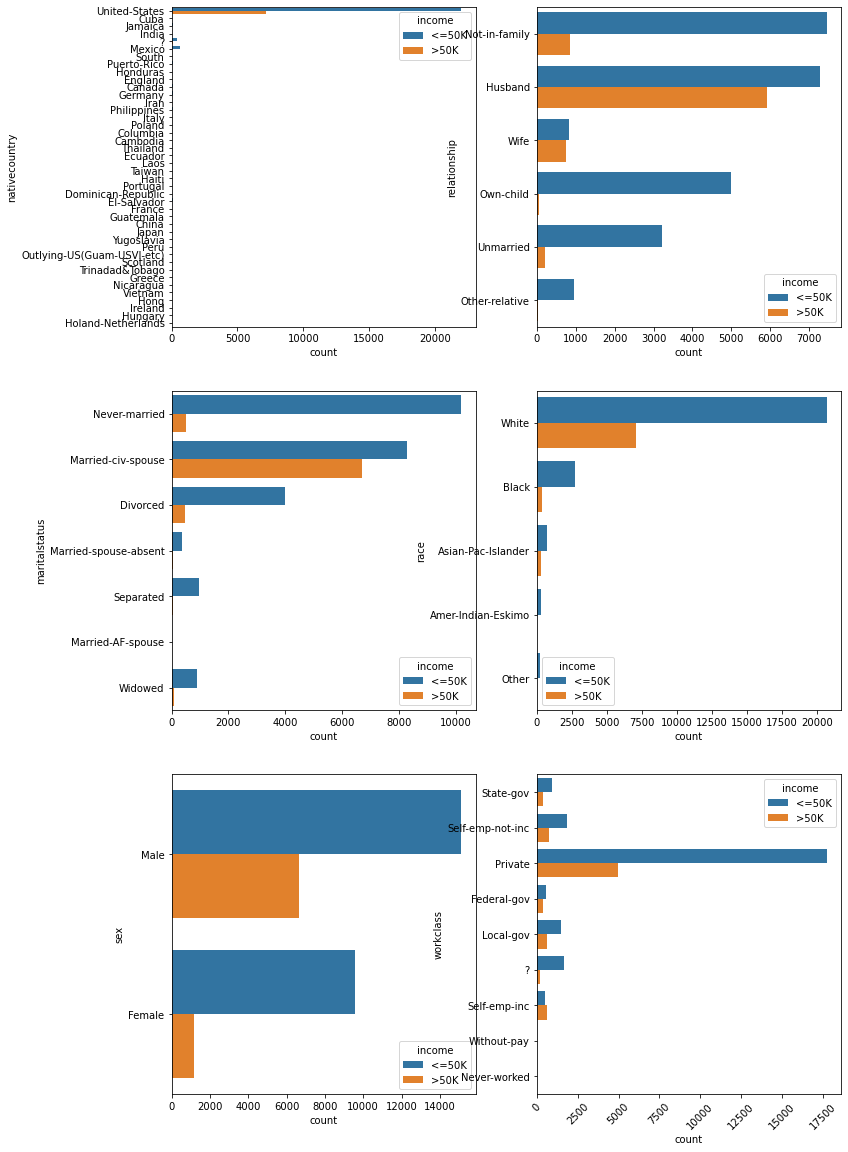

In [10]:
fig, ((a,b),(c,d),(e,f)) = plt.subplots(3,2,figsize=(12,20))
plt.xticks(rotation=45)
sns.countplot(y=df['workclass'],hue=df['income'],ax=f)
sns.countplot(y=df['relationship'],hue=df['income'],ax=b)
sns.countplot(y=df['maritalstatus'],hue=df['income'],ax=c)
sns.countplot(y=df['race'],hue=df['income'],ax=d)
sns.countplot(y=df['sex'],hue=df['income'],ax=e)
sns.countplot(y=df['nativecountry'],hue=df['income'],ax=a)

## Boxplot Analysis by Target Variable (income)

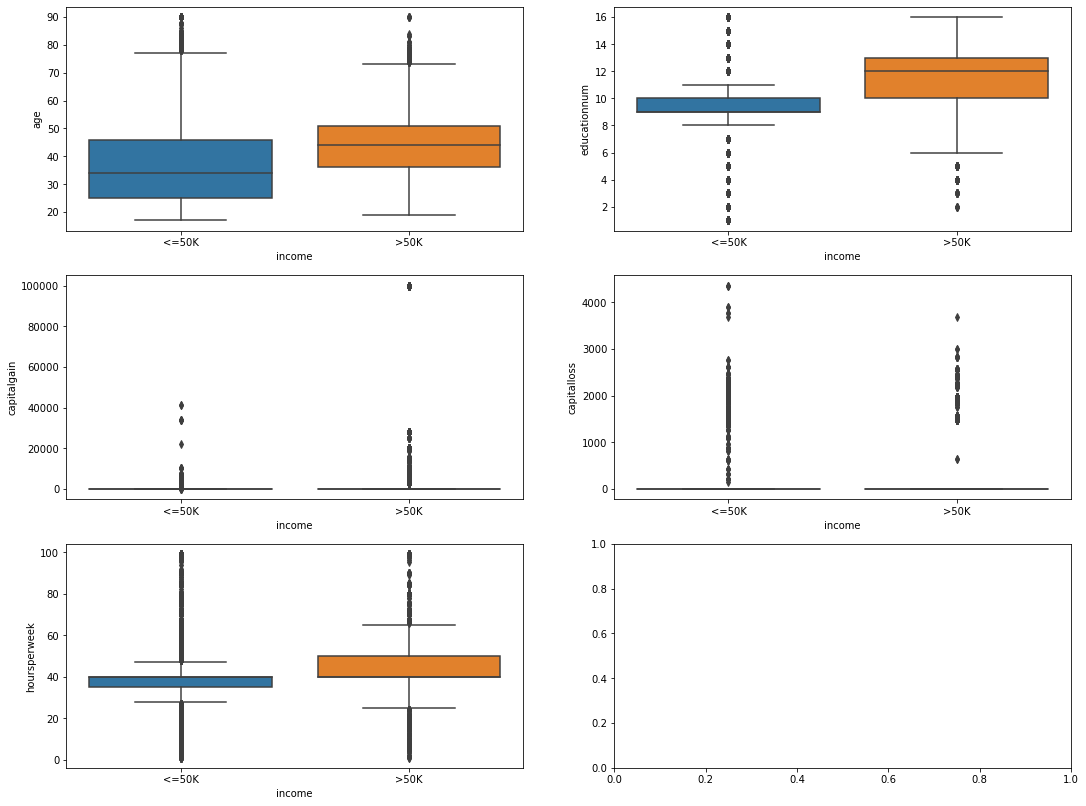

In [11]:
fig, axes = plt.subplots(3, 2, figsize=(18, 14))

sns.boxplot(y='age',x='income',data=df,ax=axes[0,0])
sns.boxplot(y='educationnum',x='income',data=df,ax=axes[0,1])
sns.boxplot(y='capitalgain',x='income',data=df,ax=axes[1,0])
sns.boxplot(y='capitalloss',x='income',data=df,ax=axes[1,1])
sns.boxplot(y='hoursperweek',x='income',data=df,ax=axes[2,0])

## Pairplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


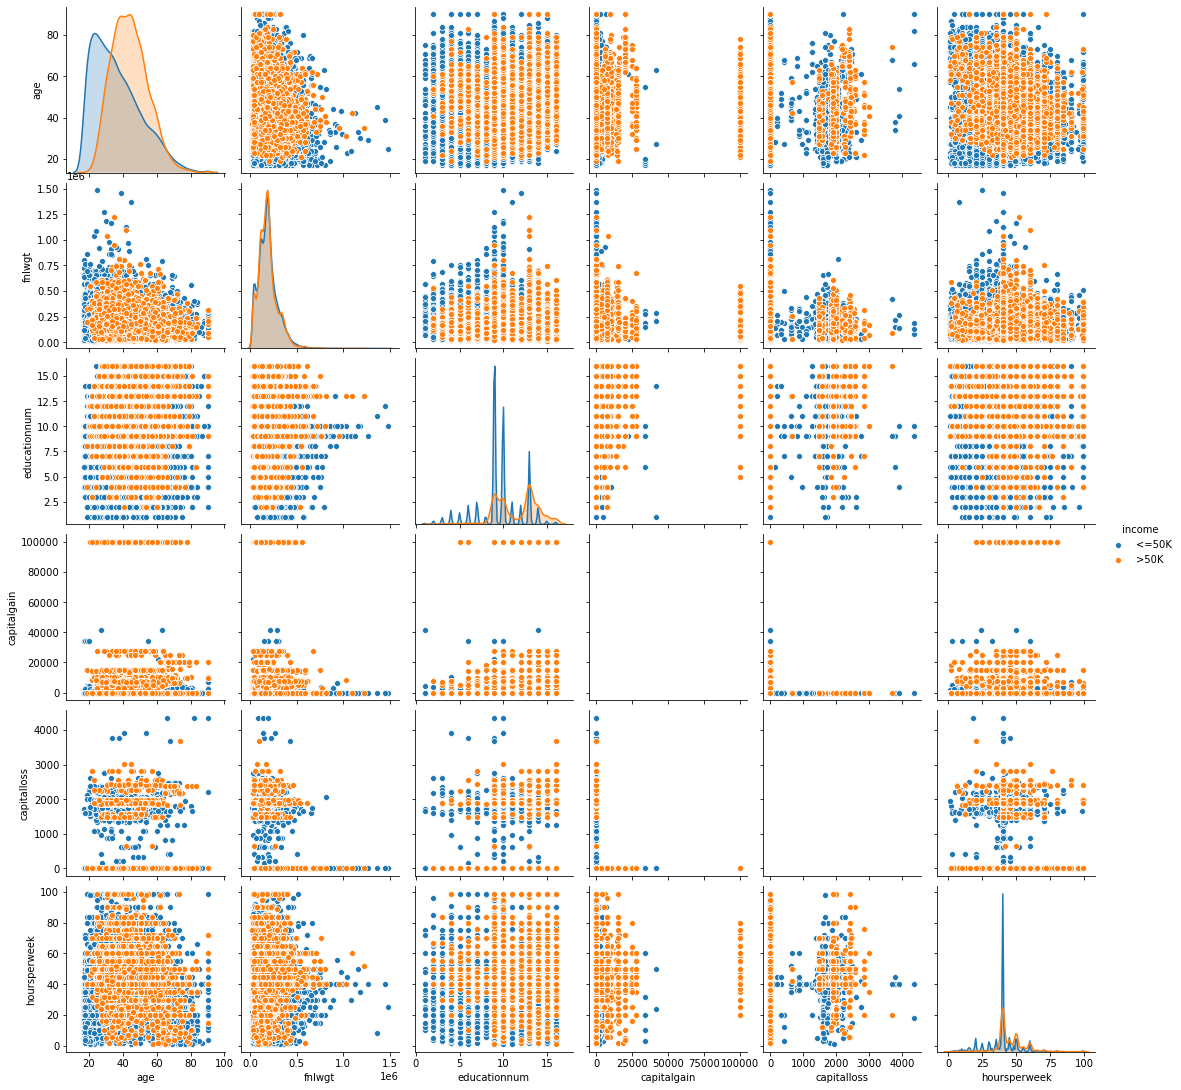

In [12]:
sns.pairplot(df, hue = 'income')

## Correlation Analysis

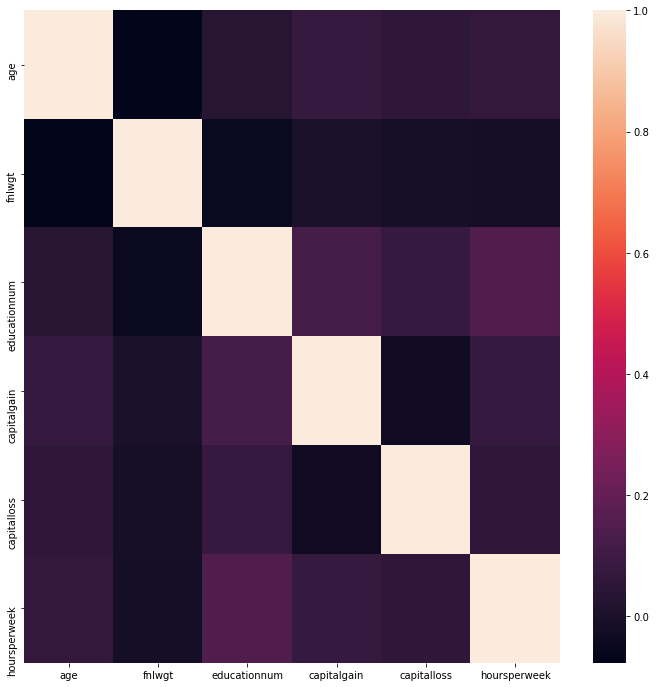

In [13]:
plt.figure(figsize=[12,12])
plt.grid(axis='y', alpha=0.75)

sns.heatmap(df.corr())

# Analyzing the Dataframe Variables

The pourpose for this section is to analyze basic feature status. I found that the data is unbalanced, as it should be, since the gini index for the US income is far from 0. There is no way to state that the tilt towards lower income is from the statistical nature of the problem rather from an analytical error on collecting data. The dataframe shows that 75% of the sample has income lower than 50k a year. This also reflects when we broad the stratification for the feature analysis by age, race, maritalstatus, relationship. workclass, education and native country. This implies that either the dataframe is biased or common sense is the truth. Either way, I face a technical problem if I want to run a classification model on this dataset and face a high performance due to overfeatting.

## Variable - age

In [14]:
df.age.unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

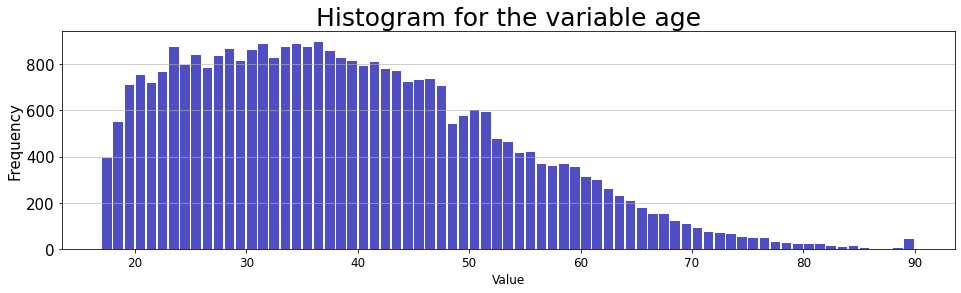

In [15]:
bins_age = len(df.age.unique())

plt.figure(figsize=[16,4])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=12)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)

plt.hist(df.age, bins = bins_age, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title('Histogram for the variable age',fontsize=25)
plt.show()

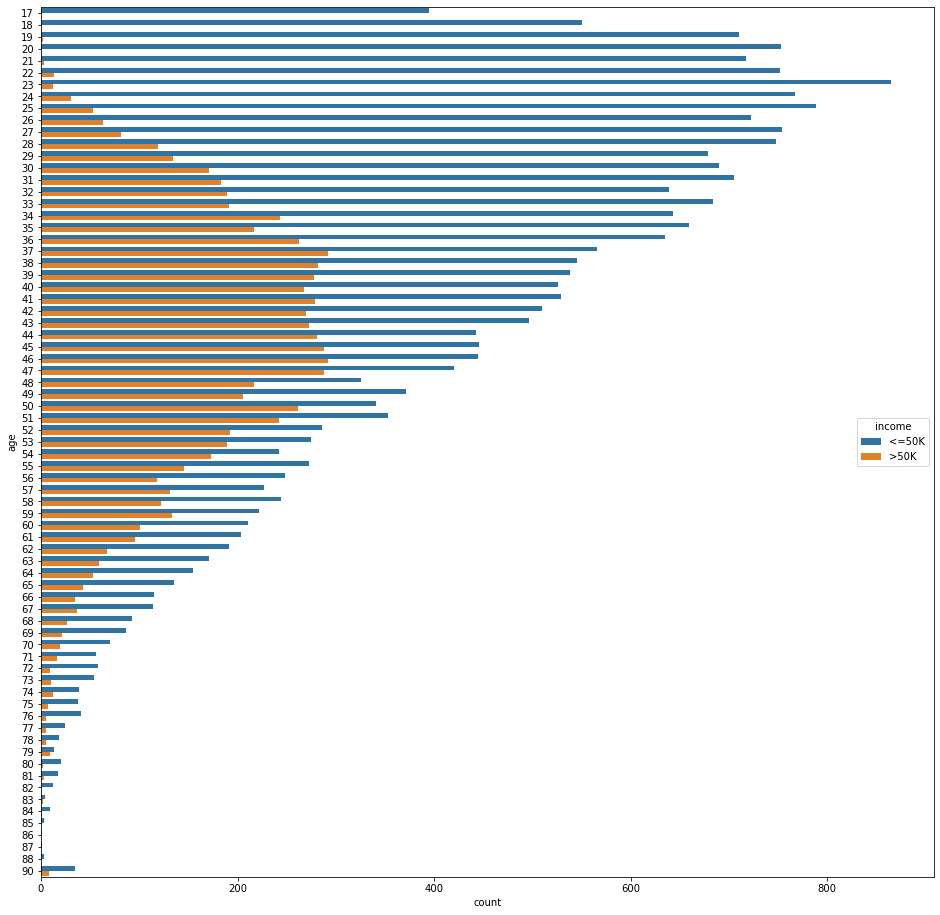

In [16]:
plt.figure(figsize=(16, 16))
sns.countplot(y=df.age, hue = df['income'], linewidth = 8)

## Variable - workclass

In [17]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

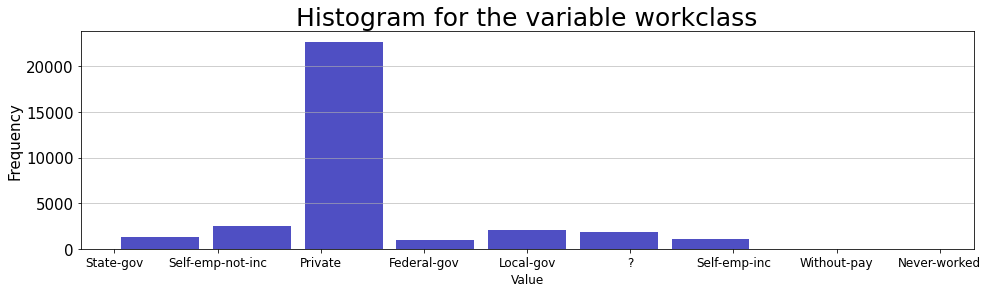

In [18]:
bins_workclass = len(df.workclass.unique())

plt.figure(figsize=[16,4])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=12)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)

plt.hist(df.workclass, bins = bins_workclass, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title('Histogram for the variable workclass',fontsize=25)
plt.show()

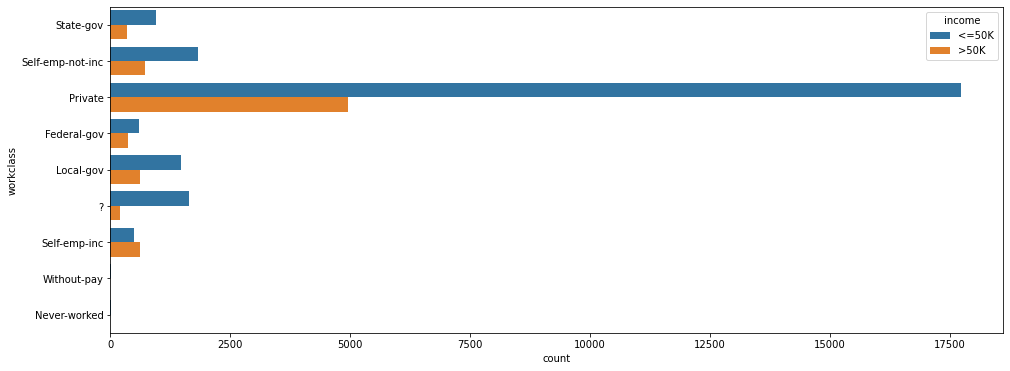

In [19]:
plt.figure(figsize=(16, 6))
sns.countplot(y=df.workclass, hue = df['income'], linewidth = 8)

In [20]:
df.groupby(['income','workclass']).agg(
{
'income':'count',
'age':'mean',
'capitalgain':'mean',
'capitalloss':'mean',
'hoursperweek':'mean'
}
)

income        age  capitalgain  capitalloss  \
income workclass                                                       
<=50K  ?                   1645  39.258359   159.157447    47.961702   
       Federal-gov          589  40.624788   173.207131    91.278438   
       Local-gov           1476  40.704607   169.179539    79.185637   
       Never-worked           7  20.571429     0.000000     0.000000   
       Private            17733  35.113404   137.458242    49.941014   
       Self-emp-inc         494  43.206478   177.941296    54.368421   
       Self-emp-not-inc    1817  44.388553   220.794717    62.629609   
       State-gov            945  37.279365   137.730159    40.100529   
       Without-pay           14  47.785714   487.857143     0.000000   
>50K   ?                    191  55.617801  4462.109948   170.989529   
       Federal-gov          371  45.711590  1881.088949   145.592992   
       Local-gov            617  44.254457  2581.126418   183.220421   
       Private             4963  42.815233  3575.285110   187.441870   
       Self-emp-inc         622  48.249196  8606.705788   235.172026   
       Self-emp-not-inc     724  46.428177  6065.330110   252.158840   
       State-gov            353  45.209632  2211.475921   198.787535   

                         hoursperweek  
income workclass                       
<=50K  ?                    31.428571  
       Federal-gov          40.093379  
       Local-gov            39.739837  
       Never-worked         28.428571  
       Private              38.802290  
       Self-emp-inc         47.135628  
       Self-emp-not-inc     43.517336  
       State-gov            37.105820  
       Without-pay          32.714286  
>50K   ?                    36.146597  
       Federal-gov          43.420485  
       Local-gov            43.956240  
       Private              45.500907  
       Self-emp-inc         50.154341  
       Self-emp-not-inc     46.691989  
       State-gov            44.186969

## Variable - education

In [21]:
df.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

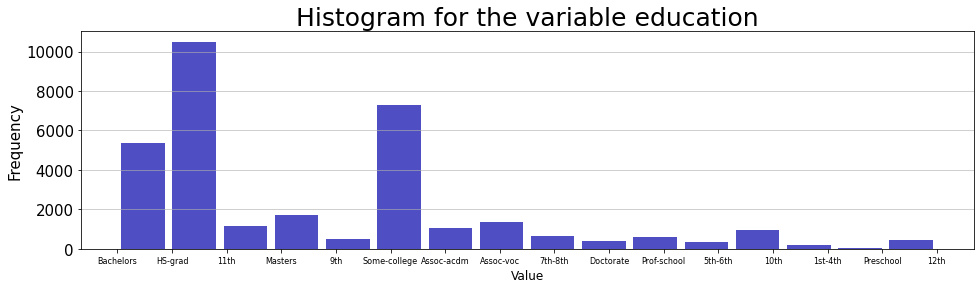

In [22]:
bins_education = len(df.education.unique())

plt.figure(figsize=[16,4])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=12)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=8)
plt.yticks(fontsize=15)

plt.hist(df.education, bins = bins_education, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title('Histogram for the variable education',fontsize=25)
plt.show()

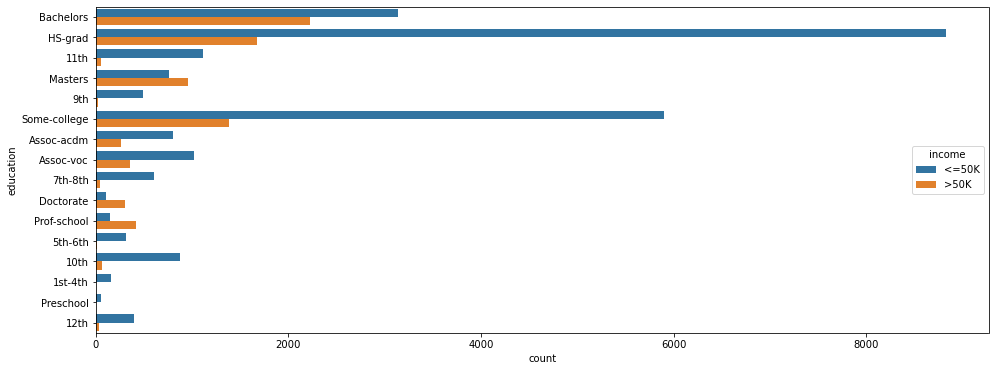

In [23]:
plt.figure(figsize=(16, 6))
sns.countplot(y=df.education, hue = df['income'], linewidth = 8)

In [24]:
df.groupby(['income','education']).agg(
{
'income':'count',
'age':'mean',
'capitalgain':'mean',
'capitalloss':'mean',
'hoursperweek':'mean'
}
)

income        age   capitalgain  capitalloss  \
income education                                                    
<=50K  10th             871  36.510907    135.154994    37.167623   
       11th            1115  31.765022     85.787444    41.613453   
       12th             400  30.952500     79.075000    30.385000   
       1st-4th          162  45.925926     83.080247    50.117284   
       5th-6th          317  42.690852     99.504732    65.744479   
       7th-8th          606  48.163366    173.485149    60.488449   
       9th              487  40.630390    134.453799    22.229979   
       Assoc-acdm       802  35.962594    110.389027    64.000000   
       Assoc-voc       1021  37.142018    196.825661    47.919687   
       Bachelors       3134  36.273452    162.901723    59.712189   
       Doctorate        107  45.158879    220.485981    46.065421   
       HS-grad         8826  37.826762    153.878541    53.642987   
       Masters          764  42.291885    285.774869    79.301047   
       Preschool         51  42.764706    898.392157    66.490196   
       Prof-school      153  43.718954    186.954248    93.385621   
       Some-college    5904  33.778794    125.684621    51.200203   
>50K   10th              62  50.338710   4189.483871   333.290323   
       11th              60  43.333333   2618.116667   207.400000   
       12th              33  44.696970   2769.090909    56.000000   
       1st-4th            6  52.000000   1281.333333     0.000000   
       5th-6th           16  46.750000   1692.000000   117.937500   
       7th-8th           40  52.725000   1149.825000   144.150000   
       9th               27  48.814815   4087.222222   151.074074   
       Assoc-acdm       265  41.675472   2244.430189   182.452830   
       Assoc-voc        361  42.545706   2180.725762   142.994460   
       Bachelors       2221  42.618190   4004.705088   201.093201   
       Doctorate        306  48.591503   6361.039216   338.647059   
       HS-grad         1675  45.022090   2805.281194   159.114627   
       Masters          959  45.450469   4376.397289   236.362878   
       Prof-school      423  45.118203  14113.711584   281.052009   
       Some-college    1387  44.173756   2612.822639   158.630137   

                     hoursperweek  
income education                   
<=50K  10th             36.574053  
       11th             33.322870  
       12th             35.035000  
       1st-4th          37.864198  
       5th-6th          38.539432  
       7th-8th          38.830033  
       9th              37.667351  
       Assoc-acdm       39.264339  
       Assoc-voc        40.817826  
       Bachelors        40.586152  
       Doctorate        45.429907  
       HS-grad          39.727510  
       Masters          41.223822  
       Preschool        36.647059  
       Prof-school      42.816993  
       Some-college     37.450203  
>50K   10th             43.774194  
       11th             45.133333  
       12th             44.818182  
       1st-4th          48.833333  
       5th-6th          46.000000  
       7th-8th          47.500000  
       9th              44.851852  
       Assoc-acdm       44.256604  
       Assoc-voc        43.853186  
       Bachelors        45.475462  
       Doctorate        47.513072  
       HS-grad          45.042985  
       Masters          45.917623  
       Prof-school      49.092199  
       Some-college     44.820476

## Variable - maritalstatus

In [25]:
df.maritalstatus.value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: maritalstatus, dtype: int64

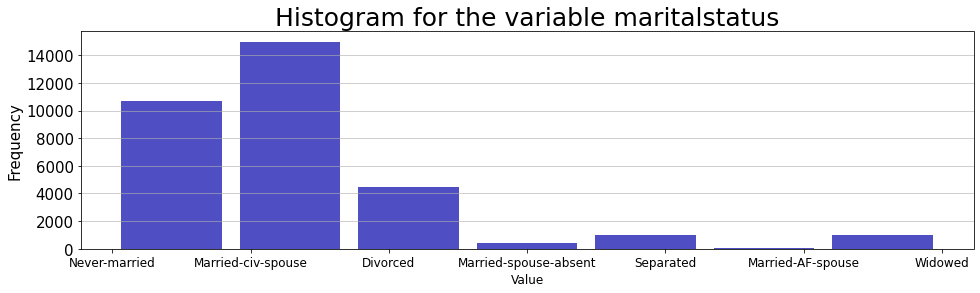

In [26]:
bins_maritalstatus = len(df.maritalstatus.unique())

plt.figure(figsize=[16,4])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=12)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)

plt.hist(df.maritalstatus, bins = bins_maritalstatus, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title('Histogram for the variable maritalstatus',fontsize=25)
plt.show()

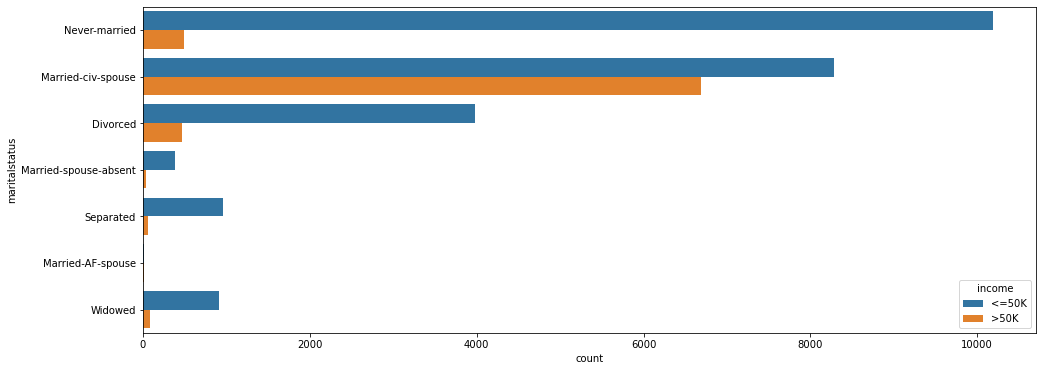

In [27]:
plt.figure(figsize=(16, 6))
sns.countplot(y=df.maritalstatus, hue = df['income'], linewidth = 8)

In [28]:
df.groupby(['income','maritalstatus']).agg(
{
'income':'count',
'age':'mean',
'capitalgain':'mean',
'capitalloss':'mean',
'hoursperweek':'mean'
}
)

income        age  capitalgain  capitalloss  \
income maritalstatus                                                        
<=50K  Divorced                 3980  42.738693   140.544724    56.079146   
       Married-AF-spouse          13  33.384615   204.076923     0.000000   
       Married-civ-spouse       8284  42.287422   219.249517    60.611540   
       Married-spouse-absent     384  39.981771   106.559896    48.312500   
       Never-married           10192  27.666013    99.052492    45.763540   
       Separated                 959  39.148071   117.190824    46.100104   
       Widowed                   908  59.012115   149.811674    65.207048   
>50K   Divorced                  463  45.645788  5781.812095   137.853132   
       Married-AF-spouse          10  31.300000   729.800000     0.000000   
       Married-civ-spouse       6692  44.436192  3678.163927   198.975194   
       Married-spouse-absent      34  47.323529  6836.647059   164.705882   
       Never-married             491  38.217923  6137.576375   188.971487   
       Separated                  66  42.348485  6614.727273   232.621212   
       Widowed                    85  58.588235  5071.117647   234.129412   

                              hoursperweek  
income maritalstatus                        
<=50K  Divorced                  40.538191  
       Married-AF-spouse         40.000000  
       Married-civ-spouse        41.653790  
       Married-spouse-absent     39.192708  
       Never-married             36.470859  
       Separated                 38.825860  
       Widowed                   32.172907  
>50K   Divorced                  47.336933  
       Married-AF-spouse         42.600000  
       Married-civ-spouse        45.303945  
       Married-spouse-absent     45.058824  
       Never-married             46.678208  
       Separated                 46.212121  
       Widowed                   41.600000

## Variable - occupation

In [29]:
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

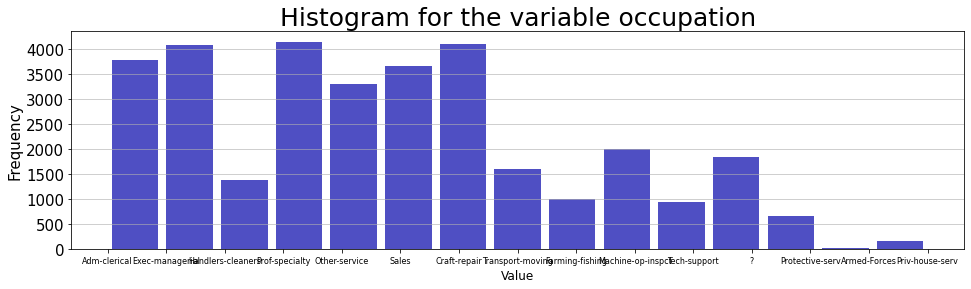

In [30]:
bins_occupation = len(df.occupation.unique())

plt.figure(figsize=[16,4])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=12)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=8)
plt.yticks(fontsize=15)

plt.hist(df.occupation, bins = bins_occupation, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title('Histogram for the variable occupation',fontsize=25)
plt.show()

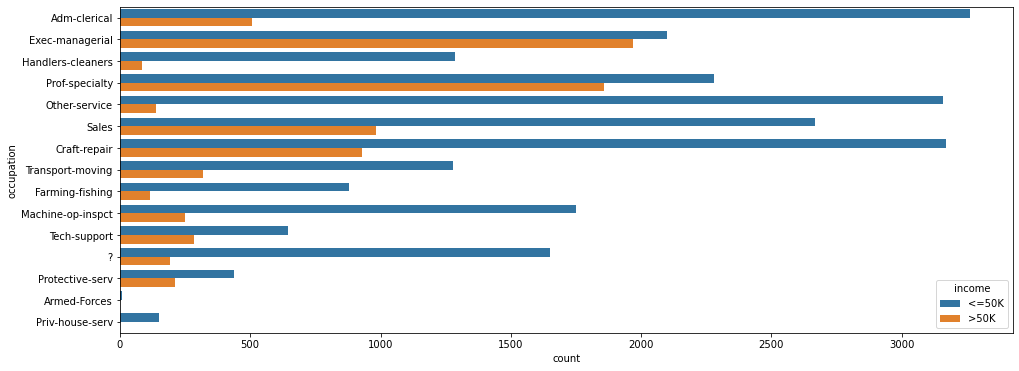

In [31]:
plt.figure(figsize=(16, 6))
sns.countplot(y=df.occupation, hue = df['income'], linewidth = 8)

In [32]:
df.groupby(['income','occupation']).agg(
{
'income':'count',
'age':'mean',
'capitalgain':'mean',
'capitalloss':'mean',
'hoursperweek':'mean'
}
)

income        age   capitalgain  capitalloss  \
income occupation                                                        
<=50K  ?                    1652  39.179177    158.483051    47.758475   
       Adm-clerical         3263  35.987128    136.621514    51.380938   
       Armed-Forces            8  28.250000      0.000000     0.000000   
       Craft-repair         3170  37.659621    147.991483    66.569716   
       Exec-managerial      2098  39.609152    184.039085    59.199237   
       Farming-fishing       879  40.445961    265.142207    43.268487   
       Handlers-cleaners    1284  31.462617    110.855140    35.895639   
       Machine-op-inspct    1752  37.048516    156.160388    48.395548   
       Other-service        3158  34.664661     80.453452    34.113046   
       Priv-house-serv       148  41.689189    111.229730    21.594595   
       Prof-specialty       2281  37.942569    191.931609    66.034196   
       Protective-serv       438  37.705479    245.623288    46.394977   
       Sales                2667  34.780277    134.014998    61.778778   
       Tech-support          645  34.355039    196.334884    53.198450   
       Transport-moving     1277  39.120595    129.480031    64.256069   
>50K   ?                     191  55.617801   4462.109948   170.989529   
       Adm-clerical          507  43.254438   2808.587771   121.378698   
       Armed-Forces            1  46.000000      0.000000  1887.000000   
       Craft-repair          929  43.712594   2360.839612   163.178687   
       Exec-managerial      1968  44.898374   4478.821646   223.738313   
       Farming-fishing       115  47.060870   3070.678261   214.469565   
       Handlers-cleaners      86  42.662791   2448.104651   191.058140   
       Machine-op-inspct     250  42.388000   1537.772000   154.988000   
       Other-service         137  41.518248   2746.474453   133.627737   
       Priv-house-serv         1  47.000000  25236.000000     0.000000   
       Prof-specialty       1859  43.677246   5836.869285   222.158687   
       Protective-serv       211  41.545024   1668.118483   144.635071   
       Sales                 983  44.336724   4537.089522   197.388606   
       Tech-support          283  43.102473   1761.204947   202.293286   
       Transport-moving      320  44.496875   1930.315625   150.218750   

                          hoursperweek  
income occupation                       
<=50K  ?                     31.415860  
       Adm-clerical          37.032485  
       Armed-Forces          40.750000  
       Craft-repair          41.607256  
       Exec-managerial       42.810772  
       Farming-fishing       46.045506  
       Handlers-cleaners     37.626947  
       Machine-op-inspct     40.383562  
       Other-service         34.339455  
       Priv-house-serv       32.871622  
       Prof-specialty        40.110478  
       Protective-serv       41.579909  
       Sales                 38.329959  
       Tech-support          38.556589  
       Transport-moving      43.624902  
>50K   ?                     36.146597  
       Adm-clerical          40.942801  
       Armed-Forces          40.000000  
       Craft-repair          44.682454  
       Exec-managerial       47.308435  
       Farming-fishing       54.208696  
       Handlers-cleaners     42.732558  
       Machine-op-inspct     43.364000  
       Other-service         43.051095  
       Priv-house-serv       35.000000  
       Prof-specialty        45.179666  
       Protective-serv       45.549763  
       Sales                 47.431333  
       Tech-support          41.427562  
       Transport-moving      48.771875

## Variable - relationship

In [33]:
df.relationship.value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

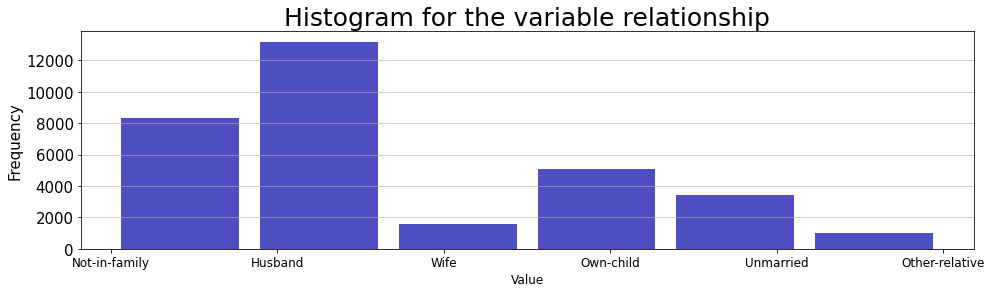

In [34]:
bins_relationship = len(df.relationship.unique())

plt.figure(figsize=[16,4])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=12)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)

plt.hist(df.relationship, bins = bins_relationship, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title('Histogram for the variable relationship',fontsize=25)
plt.show()

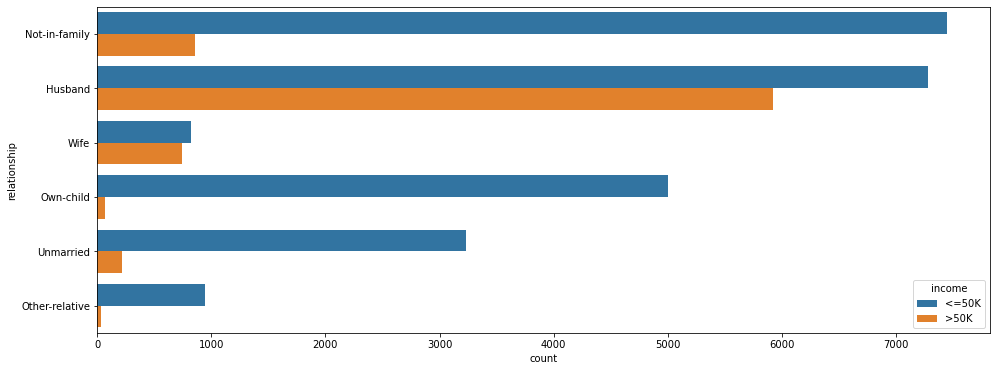

In [35]:
plt.figure(figsize=(16, 6))
sns.countplot(y=df.relationship, hue = df['income'], linewidth = 8)

In [36]:
df.groupby(['income','relationship']).agg(
{
'income':'count',
'age':'mean',
'capitalgain':'mean',
'capitalloss':'mean',
'hoursperweek':'mean'
}
)

income        age  capitalgain  capitalloss  \
income relationship                                                  
<=50K  Husband           7275  42.922062   206.474089    60.867216   
       Not-in-family     7449  37.821318   136.980803    64.928984   
       Other-relative     944  32.816737   162.296610    38.572034   
       Own-child         5001  24.680664    77.067187    38.379324   
       Unmarried         3228  39.918835   117.784387    33.425341   
       Wife               823  38.930741   286.589307    61.948967   
>50K   Husband           5918  44.920750  3747.914329   201.967895   
       Not-in-family      856  42.912383  6019.816589   166.429907   
       Other-relative      37  42.027027  3272.297297   376.891892   
       Own-child           67  35.820896  6021.626866   124.044776   
       Unmarried          218  45.848624  5448.756881   160.509174   
       Wife               745  40.857718  3176.765101   179.932886   

                       hoursperweek  
income relationship                  
<=50K  Husband            42.393677  
       Not-in-family      39.885756  
       Other-relative     36.783898  
       Own-child          33.130174  
       Unmarried          38.619269  
       Wife               35.888214  
>50K   Husband            46.242481  
       Not-in-family      46.773364  
       Other-relative     42.675676  
       Own-child          43.656716  
       Unmarried          46.266055  
       Wife               37.936913

## Variable - race

In [37]:
df.race.value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

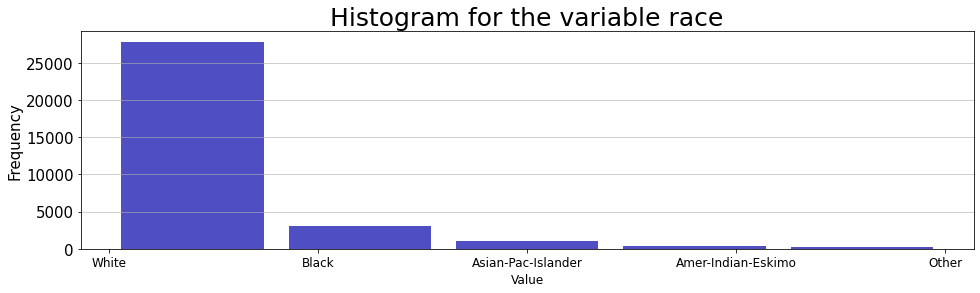

In [38]:
bins_race = len(df.race.unique())

plt.figure(figsize=[16,4])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=12)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)

plt.hist(df.race, bins = bins_race, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title('Histogram for the variable race',fontsize=25)
plt.show()

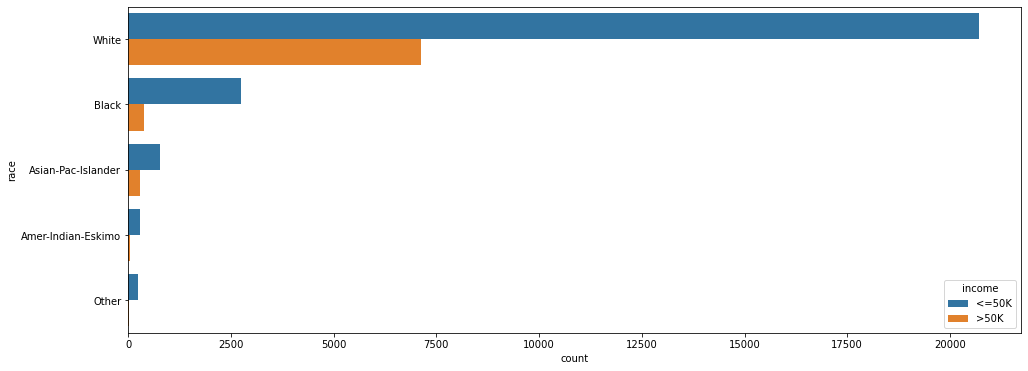

In [39]:
plt.figure(figsize=(16, 6))
sns.countplot(y=df.race, hue = df['income'], linewidth = 8)

In [40]:
df.groupby(['income','race']).agg(
{
'income':'count',
'age':'mean',
'capitalgain':'mean',
'capitalloss':'mean',
'hoursperweek':'mean'
}
)

income        age  capitalgain  capitalloss  \
income race                                                              
<=50K  Amer-Indian-Eskimo     275  36.843636   206.930909    20.374545   
       Asian-Pac-Islander     763  36.073394   114.322412    58.604194   
       Black                 2737  36.927293   113.454878    44.442455   
       Other                  246  32.646341    72.174797    59.605691   
       White                20699  36.839316   154.826127    54.450601   
>50K   Amer-Indian-Eskimo      36  39.694444  3820.888889   139.611111   
       Asian-Pac-Islander     276  42.373188  5249.224638   203.981884   
       Black                  387  43.713178  4121.260982   173.136951   
       Other                   25  41.440000  9421.520000    75.480000   
       White                 7117  44.384713  3933.589855   196.542223   

                           hoursperweek  
income race                              
<=50K  Amer-Indian-Eskimo     39.410909  
       Asian-Pac-Islander     38.425950  
       Black                  37.580197  
       Other                  38.914634  
       White                  39.013624  
>50K   Amer-Indian-Eskimo     44.916667  
       Asian-Pac-Islander     44.829710  
       Black                  44.382429  
       Other                  44.920000  
       White                  45.562035

## Variable - sex

In [41]:
df.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

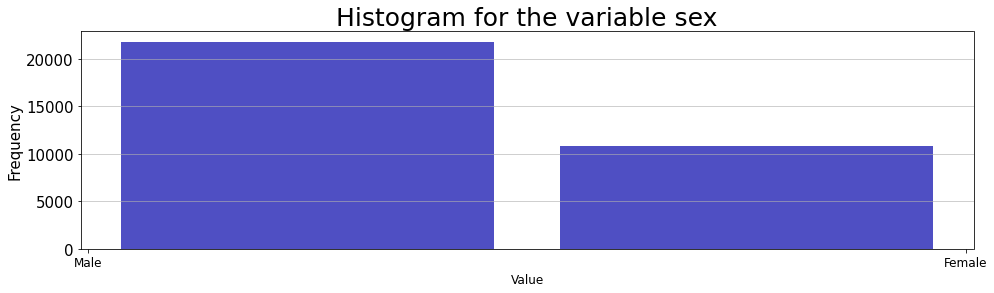

In [42]:
bins_sex = len(df.sex.unique())

plt.figure(figsize=[16,4])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=12)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)

plt.hist(df.sex, bins = bins_sex, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title('Histogram for the variable sex',fontsize=25)
plt.show()

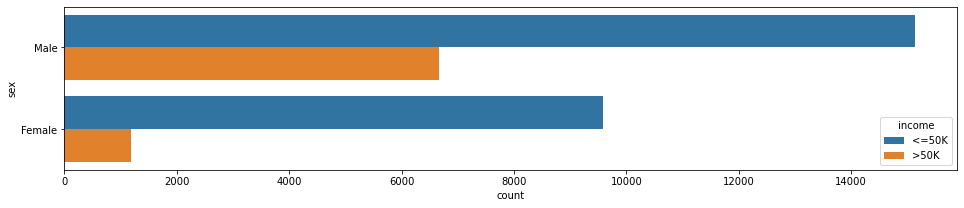

In [43]:
plt.figure(figsize=(16, 3))
sns.countplot(y=df.sex, hue = df['income'], linewidth = 8)

In [44]:
df.groupby(['income','sex']).agg(
{
'income':'count',
'age':'mean',
'capitalgain':'mean',
'capitalloss':'mean',
'hoursperweek':'mean'
}
)

income        age  capitalgain  capitalloss  hoursperweek
income sex                                                              
<=50K  Female    9592  36.210801   121.986134    47.364470     35.916701
       Male     15128  37.147012   165.723823    56.806782     40.693879
>50K   Female    1179  42.125530  4200.389313   173.648855     40.426633
       Male      6662  44.625788  3971.765836   198.780396     46.366106

## Variable - capitalgain

In [45]:
df.capitalgain.unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

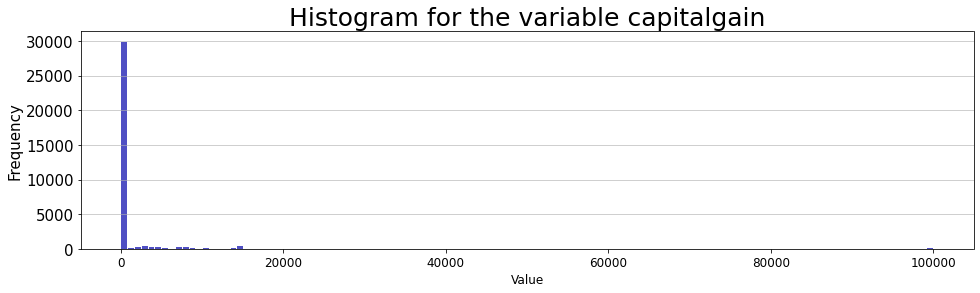

In [46]:
bins_capitalgain = len(df.capitalgain.unique())

plt.figure(figsize=[16,4])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=12)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)

plt.hist(df.capitalgain, bins = bins_capitalgain, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title('Histogram for the variable capitalgain',fontsize=25)
plt.show()

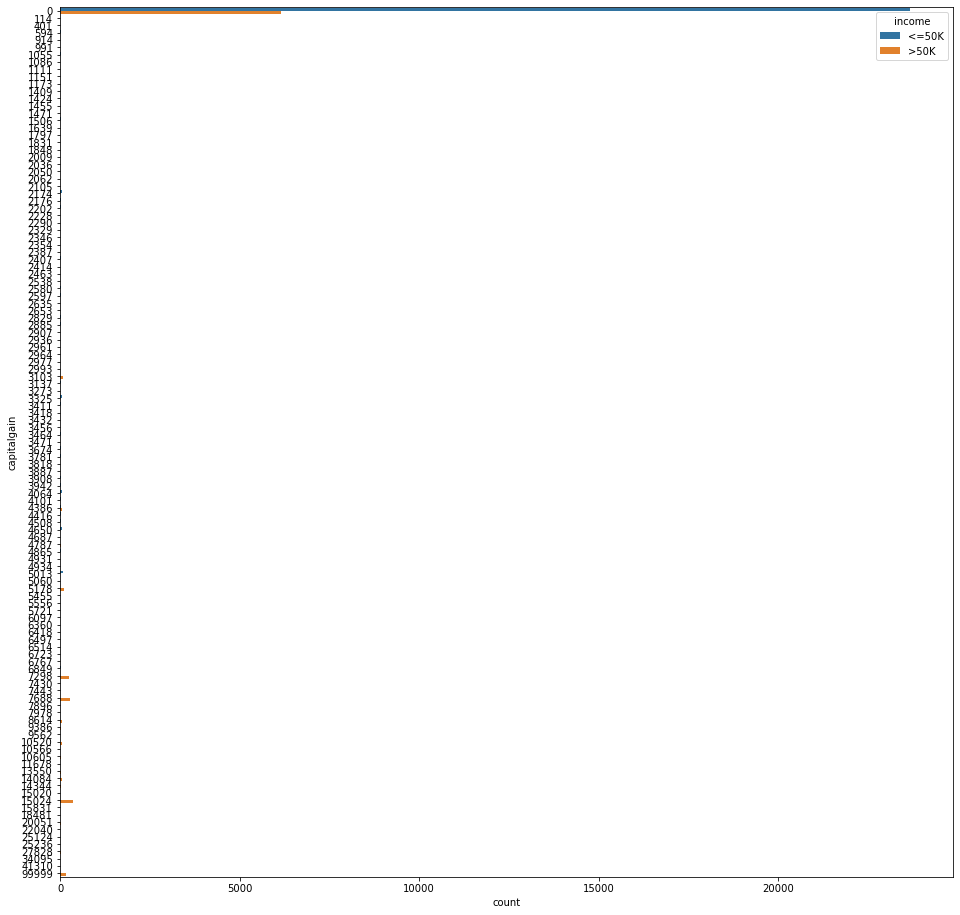

In [47]:
plt.figure(figsize=(16, 16))
sns.countplot(y=df.capitalgain, hue = df['income'], linewidth = 8)

## Variable - capitalloss

In [48]:
df.capitalloss.unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

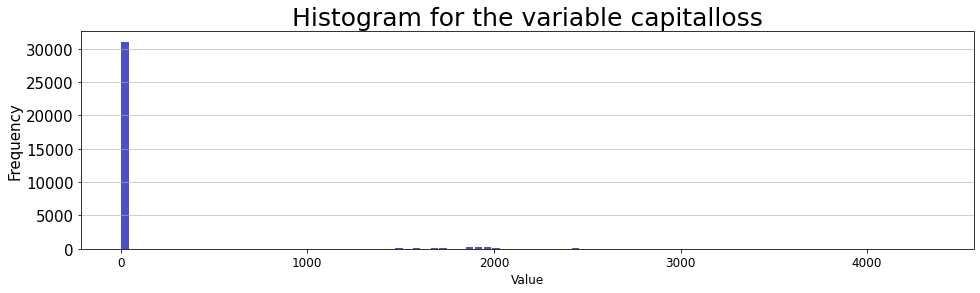

In [49]:
bins_capitalloss = len(df.capitalloss.unique())

plt.figure(figsize=[16,4])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=12)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)

plt.hist(df.capitalloss, bins = bins_capitalloss, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title('Histogram for the variable capitalloss',fontsize=25)
plt.show()

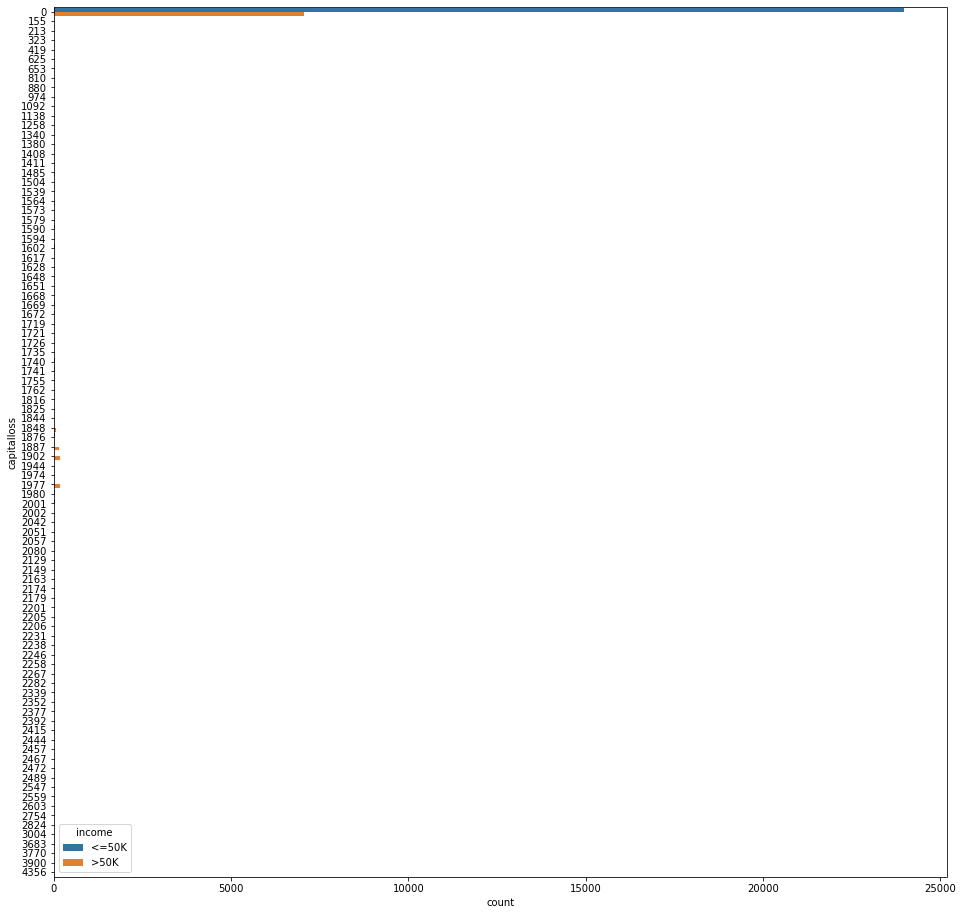

In [50]:
plt.figure(figsize=(16, 16))
sns.countplot(y=df.capitalloss, hue = df['income'], linewidth = 8)

## Variable - hoursperweek

In [51]:
df.hoursperweek.unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

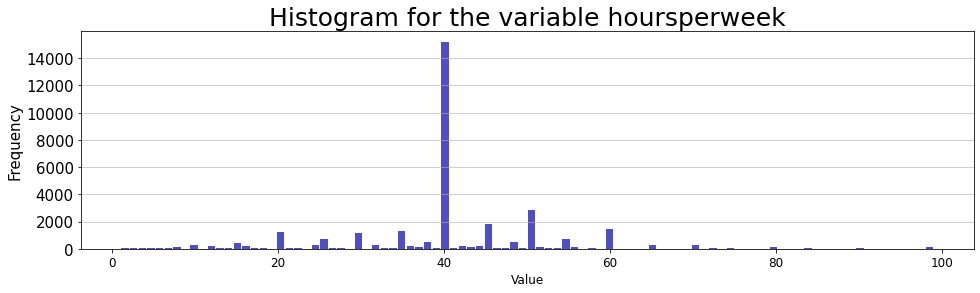

In [52]:
bins_hoursperweek = len(df.hoursperweek.unique())

plt.figure(figsize=[16,4])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=12)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)

plt.hist(df.hoursperweek, bins = bins_hoursperweek, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title('Histogram for the variable hoursperweek',fontsize=25)
plt.show()

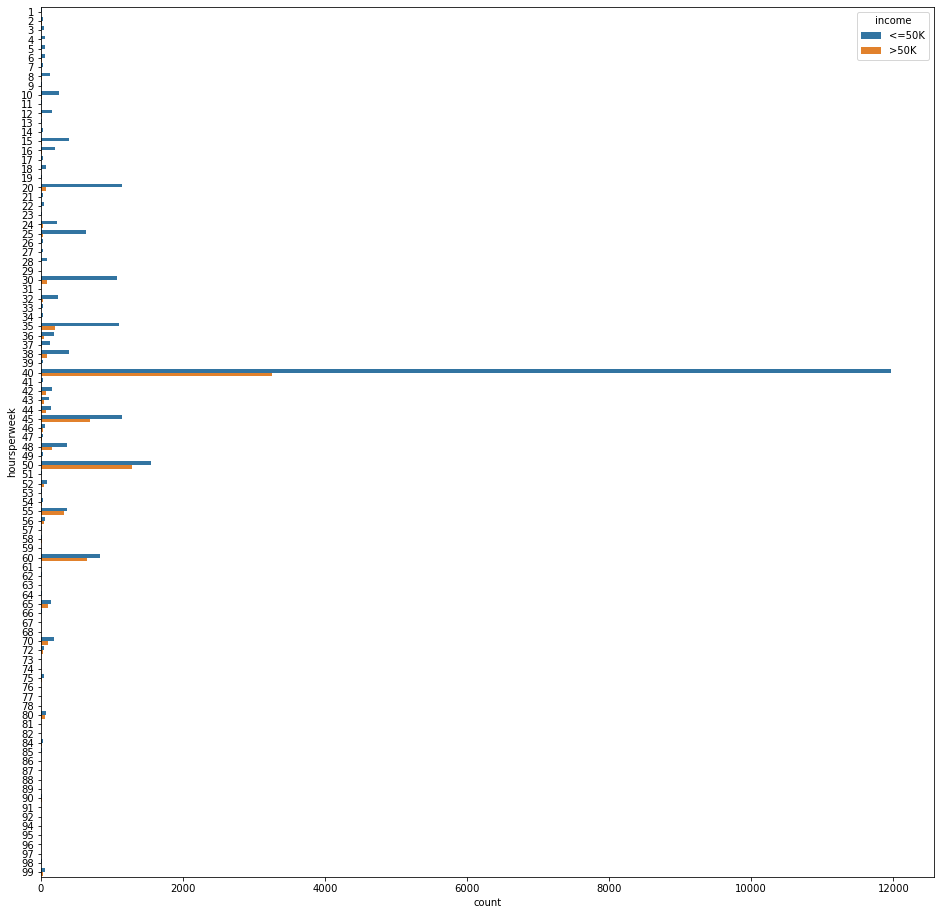

In [53]:
plt.figure(figsize=(16, 16))
sns.countplot(y=df.hoursperweek, hue = df['income'], linewidth = 8)

## Variable - income

In [54]:
df.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

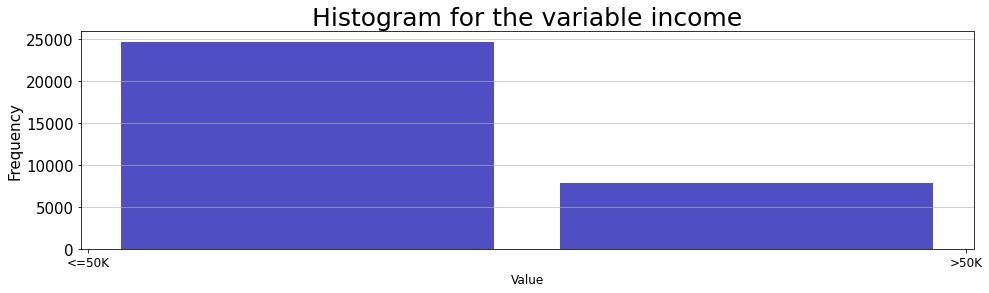

In [55]:
bins_income = len(df.income.unique())

plt.figure(figsize=[16,4])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=12)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)

plt.hist(df.income, bins = bins_income, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title('Histogram for the variable income',fontsize=25)
plt.show()

## Variable - nativecountry

In [56]:
df.nativecountry.value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

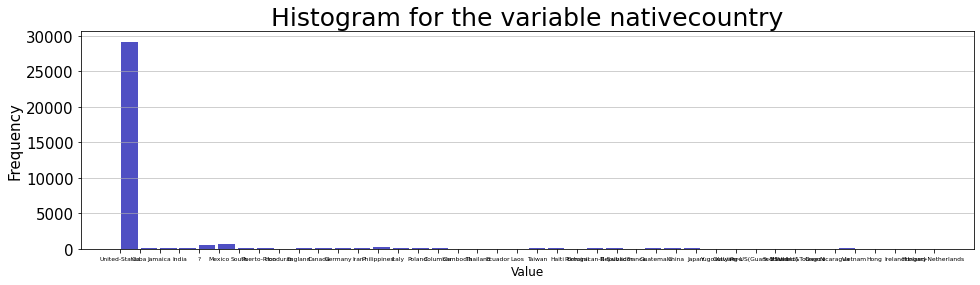

In [57]:
bins_nativecountry = len(df.nativecountry.unique())

plt.figure(figsize=[16,4])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=12)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=6)
plt.yticks(fontsize=15)

plt.hist(df.nativecountry, bins = bins_nativecountry, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title('Histogram for the variable nativecountry',fontsize=25)
plt.show()

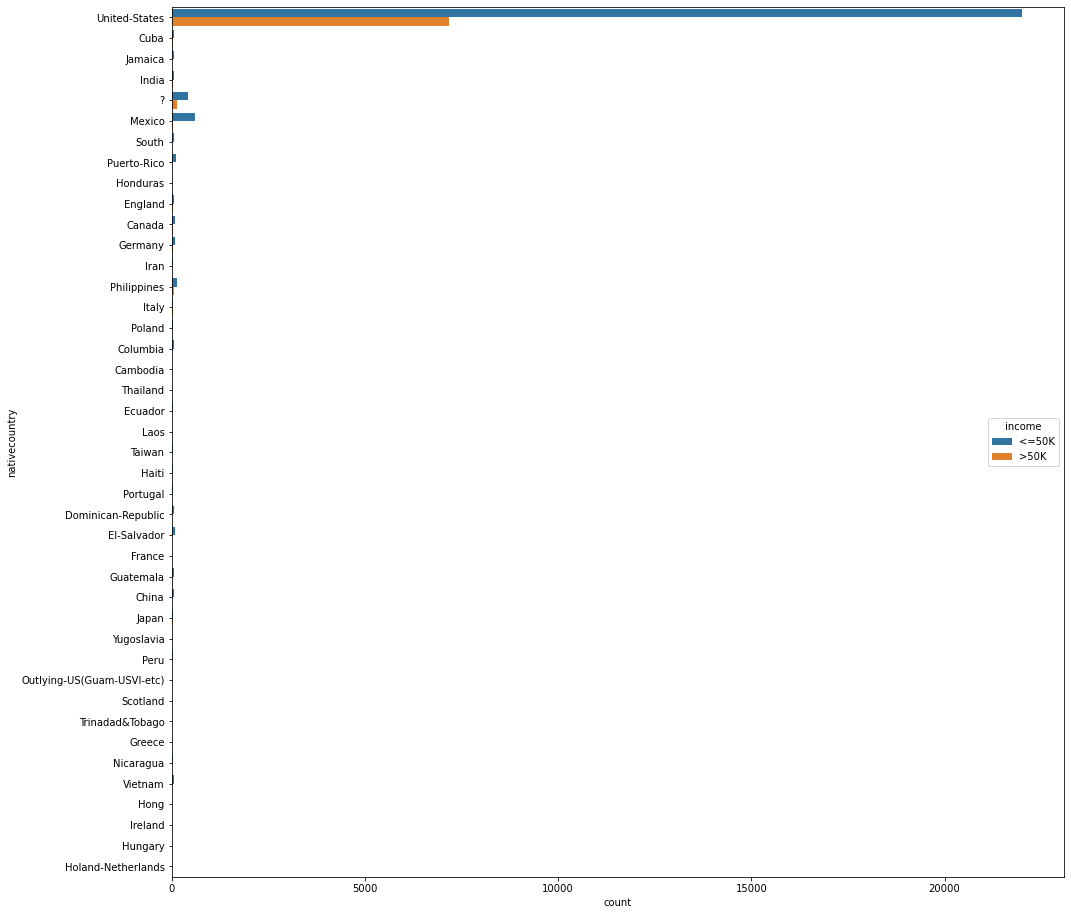

In [58]:
plt.figure(figsize=(16, 16))
sns.countplot(y=df.nativecountry, hue = df['income'], linewidth = 8)

In [59]:
df.groupby(['income','nativecountry']).agg(
{
'income':'count',
'age':'mean',
'capitalgain':'mean',
'capitalloss':'mean',
'hoursperweek':'mean'
}
)

income        age   capitalgain  \
income nativecountry                                                 
<=50K  ?                              437  36.853547    113.757437   
       Cambodia                        12  35.666667    498.250000   
       Canada                          82  41.012195    110.695122   
       China                           55  41.800000    103.890909   
       Columbia                        57  39.228070    186.947368   
       Cuba                            70  47.285714    136.985714   
       Dominican-Republic              68  37.941176     48.897059   
       Ecuador                         24  34.833333    224.458333   
       El-Salvador                     97  32.649485    190.773196   
       England                         60  38.966667    208.233333   
       France                          17  38.117647    144.882353   
       Germany                         93  36.817204    148.096774   
       Greece                          21  44.666667    347.761905   
       Guatemala                       61  32.262295    116.147541   
       Haiti                           40  37.300000      0.000000   
       Holand-Netherlands               1  32.000000      0.000000   
       Honduras                        12  32.750000      0.000000   
       Hong                            14  34.571429      0.000000   
       Hungary                         10  47.000000    413.800000   
       India                           60  35.733333    209.916667   
       Iran                            25  38.120000      0.000000   
       Ireland                         19  34.578947    409.842105   
       Italy                           48  44.375000    277.375000   
       Jamaica                         71  34.676056     48.042254   
       Japan                           38  35.315789    201.473684   
       Laos                            16  33.937500    180.312500   
       Mexico                         610  32.901639    135.537705   
       Nicaragua                       32  33.593750    212.312500   
       Outlying-US(Guam-USVI-etc)      14  38.714286      0.000000   
       Peru                            29  35.379310     63.137931   
       Philippines                    137  37.978102     20.649635   
       Poland                          48  41.250000    169.583333   
       Portugal                        33  40.333333    256.060606   
       Puerto-Rico                    102  39.803922     83.980392   
       Scotland                         9  36.333333      0.000000   
       South                           64  37.218750     70.437500   
       Taiwan                          31  29.322581     71.032258   
       Thailand                        15  35.400000      0.000000   
       Trinadad&Tobago                 17  41.176471      0.000000   
       United-States                21999  36.816719    151.071549   
       Vietnam                         62  33.951613    240.193548   
       Yugoslavia                      10  38.000000      0.000000   
>50K   ?                              146  44.328767   6873.205479   
       Cambodia                         7  41.428571   1935.714286   
       Canada                          39  45.769231   4433.923077   
       China                           20  44.550000   1088.600000   
       Columbia                         2  53.500000      0.000000   
       Cuba                            25  41.520000   1011.920000   
       Dominican-Republic               2  30.500000  49999.500000   
       Ecuador                          4  47.500000   2346.500000   
       El-Salvador                      9  50.111111   4708.111111   
       England                         30  45.533333   2177.700000   
       France                          12  40.166667   1116.750000   
       Germany                         44  44.409091   2449.068182   
       Greece                           8  50.250000   3741.250000   
       Guatemala                        3  35

## Overal Assessment on the Dataframe



# Feature Engineering - New Variables

## Creating New Variables

In this section I shall create new variables from the old categorical ones. I will use dictionaries to create numeric features from the categorical ones.

In [60]:
df['sex_new'] = df['sex'].map({'Male':0, 'Female':1}).astype(int)

In [61]:
ethnicity_key = {'White':0, 'Black':1, 
                 'Asian-Pac-Islander':2,
                 'Amer-Indian-Eskimo':3, 
                 'Other':4
                }

df['race_new'] = df['race'].map(ethnicity_key).astype(int)

In [62]:
origin_key = {'?':0,
              'United-States':1, 
              'Mexico':2, 
              'Philippines':3,
              'Germany':4, 
              'Canada':5, 
              'Puerto-Rico':6, 
              'El-Salvador':7, 
              'India':8, 
              'Cuba':9, 
              'England':10,
              'Jamaica':11, 
              'South':12, 
              'China':13, 
              'Italy':14, 
              'Dominican-Republic':15, 
              'Vietnam':16,
              'Guatemala':17, 
              'Japan':18, 
              'Poland':19, 
              'Columbia':20, 
              'Taiwan':21,
              'Haiti':22, 
              'Iran':23, 
              'Portugal':24, 
              'Nicaragua':25, 
              'Peru':26, 
              'France':27, 
              'Greece':28, 
              'Ecuador':29, 
              'Ireland':30,
              'Hong':31,
              'Trinadad&Tobago':32, 
              'Cambodia':33, 
              'Laos':34, 
              'Thailand':35, 
              'Yugoslavia':36, 
              'Outlying-US(Guam-USVI-etc)':37, 
              'Hungary':38,
              'Honduras':39, 
              'Scotland':40, 
              'Holand-Netherlands':41
             }

df['nativecountry_new'] = df['nativecountry'].map(origin_key).astype(int)

In [63]:
work_key = {'Private':0, 
            'Self-emp-not-inc':1, 
            'Local-gov':2, 
            '?':3, 
            'State-gov':4, 
            'Self-emp-inc':5, 
            'Federal-gov':6, 
            'Without-pay':7,
            'Never-worked':8
           }

df['workclass_new'] = df['workclass'].map(work_key).astype(int)

In [64]:
education_key = {'Preschool':0, 
                 '1st-4th':1, 
                 '5th-6th':2,
                 '7th-8th':3, 
                 '9th':4, 
                 '10th':5, 
                 '11th':6,
                 '12th':7,
                 'Prof-school':8,
                 'HS-grad':9,
                 'Assoc-acdm':10,
                 'Assoc-voc':11,
                 'Some-college':12,
                 'Bachelors':13,
                 'Masters':14,
                 'Doctorate':15
                }

df['education_new'] = df['education'].map(education_key).astype(int)

In [65]:
marital_status_key = {'Married-civ-spouse':0, 
                      'Never-married':1, 
                      'Divorced':2,
                      'Separated':3, 
                      'Widowed':4, 
                      'Married-spouse-absent':5, 
                      'Married-AF-spouse':6}

df['maritalstatus_new'] = df['maritalstatus'].map(marital_status_key).astype(int)

In [66]:
occupation_key = {'Prof-specialty':0, 
                  'Craft-repair':1, 
                  'Exec-managerial':2, 
                  'Adm-clerical':3, 
                  'Sales':4, 
                  'Other-service':5,
                  'Machine-op-inspct':6, 
                  '?':7, 
                  'Transport-moving':8, 
                  'Handlers-cleaners':9, 
                  'Farming-fishing':10, 
                  'Tech-support':11,
                  'Protective-serv':12, 
                  'Priv-house-serv':13, 
                  'Armed-Forces':14
                 }

df['occupation_new'] = df['occupation'].map(occupation_key).astype(int)

In [67]:
relationship_key = {'Husband':0, 
                    'Not-in-family':1, 
                    'Own-child':2, 
                    'Unmarried':3,
                    'Wife':4, 
                    'Other-relative':5
                   }

df['relationship_new'] = df['relationship'].map(relationship_key).astype(int)

In [68]:
df['income_new'] = df['income'].map({'<=50K':0, '>50K':1}).astype(int)

## One Hot Encoding

In this section I transform all the categorical features into dummy variables by using the get_dummies pandas function. The categorical features are workclass, education, maritalstatus, occupation, relationship, race and sex.

In [69]:
cols_ohe = ['workclass', 
            'education', 
            'maritalstatus', 
            'occupation', 
            'relationship', 
            'race', 
            'sex',
            'nativecountry'
           ]

df_ohe = df[cols_ohe]

df_ohe = pd.get_dummies(df_ohe, columns = cols_ohe)

df_ohe;

In [70]:
df2 = df.join(df_ohe)

df2;

## Excluding Outliers from the Variables Capital Gain and Loss

In this section I eliminated outliers from the capital gain and capital loss variables by using a two standard deviation condition as a filter for both features. I decided to do so, since by analyzing the possible values from both variables it is uncertain that values such as 9999 are actual valid values or non disclosure values such as the "?" on some of the categorical features. 

In [71]:
collections.Counter(np.abs(stats.zscore(df2.capitalgain) < 2) & 
                    np.abs(stats.zscore(df2.capitalloss) < 2)
                    )

Counter({True: 30821, False: 1740})

In [72]:
df2 = df2[np.abs(stats.zscore(df2.capitalgain) < 2) & 
          np.abs(stats.zscore(df2.capitalloss) < 2)
         ]

## Taking Care of the Age feature

In this section I decided to eliminate observations where the age value is over 65

In [73]:
df2.age.unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47, 46,
       36, 79, 27, 67, 33, 76, 55, 61, 70, 68, 45, 66, 58, 51, 17, 60, 64,
       75, 65, 26, 77, 62, 63, 80, 72, 74, 69, 71, 73, 81, 78, 90, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

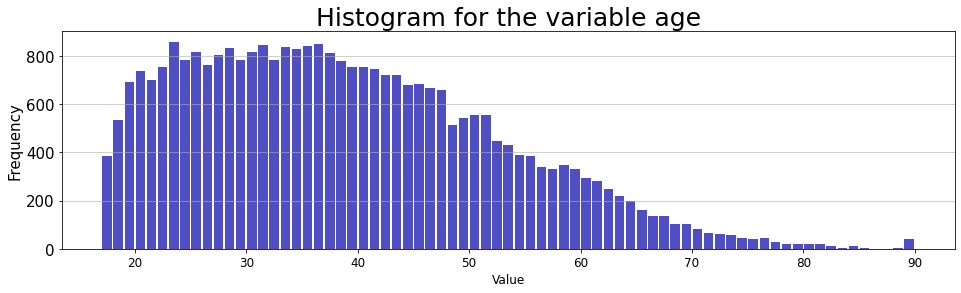

In [74]:
bins_age = len(df2.age.unique())

plt.figure(figsize=[16,4])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=12)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)

plt.hist(df2.age, bins = bins_age, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title('Histogram for the variable age',fontsize=25)
plt.show()

In [75]:
df2.age.mean()

38.34281820836443

In [76]:
df2.age.std()

13.62621650387917

In [77]:
len(df2[df2.age > 65])

1052

In [78]:
collections.Counter(df2[df2.age <= 65].income)

Counter({'<=50K': 23104, '>50K': 6665})

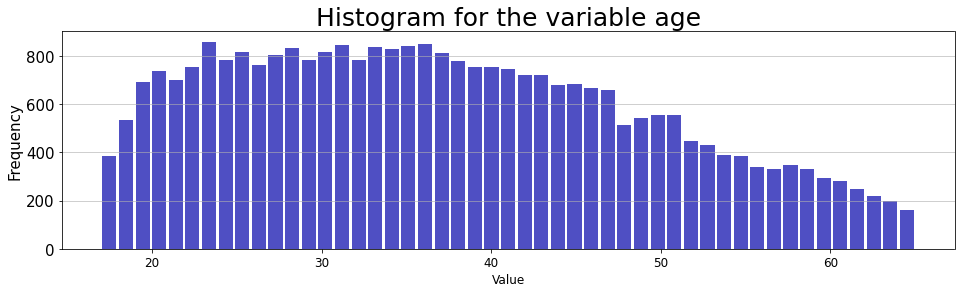

In [79]:
dftest = df2[df2.age <= 65]

bins_age = len(dftest.age.unique())

plt.figure(figsize=[16,4])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=12)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)

plt.hist(dftest.age, bins = bins_age, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title('Histogram for the variable age',fontsize=25)
plt.show()

In [80]:
df2 = df2[df2.age <= 65]

## Creating new normalized variables

In [81]:
df2['capitalgain_norm'] = (df2.capitalgain - df2.capitalgain.mean())/df2.capitalgain.std()
df2['capitalloss_norm'] = (df2.capitalloss - df2.capitalloss.mean())/df2.capitalloss.std()

## Principal Component Analysis

in this section I applied the PCA analysis to identify possible independent variables to be droped. From the PCA result one can reach the conclusion that every variable adds variance to the dataframe, so I decided to take it out only the original features and living only the one hot encoded variables and the new numeric categorical features.

In [82]:
colpca = [
#'age',
'workclass',
'fnlwgt',
'education',
'educationnum',
'maritalstatus',
'occupation',
'relationship',
'race',
'sex',
'capitalgain',
'capitalloss',
'hoursperweek',
'nativecountry',
#'income',
'income_new'
]

dfpca = df2

dfpca = dfpca.drop(colpca, axis=1)

dfpca.head()

,age,income,sex_new,race_new,nativecountry_new,workclass_new,education_new,maritalstatus_new,occupation_new,relationship_new,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,maritalstatus_Divorced,maritalstatus_Married-AF-spouse,maritalstatus_Married-civ-spouse,maritalstatus_Married-spouse-absent,maritalstatus_Never-married,maritalstatus_Separated,maritalstatus_Widowed,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,nativecountry_?,nativecountry_Cambodia,nativecountry_Canada,nativecountry_China,nativecountry_Columbia,nativecountry_Cuba,nativecountry_Dominican-Republic,nativecountry_Ecuador,nativecountry_El-Salvador,nativecountry_England,nativecountry_France,nativecountry_Germany,nativecountry_Greece,nativecountry_Guatemala,nativecountry_Haiti,nativecountry_Holand-Netherlands,nativecountry_Honduras,nativecountry_Hong,nativecountry_Hungary,nativecountry_India,nativecountry_Iran,nativecountry_Ireland,nativecountry_Italy,nativecountry_Jamaica,nativecountry_Japan,nativecountry_Laos,nativecountry_Mexico,nativecountry_Nicaragua,nativecountry_Outlying-US(Guam-USVI-etc),nativecountry_Peru,nativecountry_Philippines,nativecountry_Poland,nativecountry_Portugal,nativecountry_Puerto-Rico,nativecountry_Scotland,nativecountry_South,nativecountry_Taiwan,nativecountry_Thailand,nativecountry_Trinadad&Tobago,nativecountry_United-States,nativecountry_Vietnam,nativecountry_Yugoslavia,capitalgain_norm,capitalloss_norm
0,39,<=50K,0,0,1,4,13,1,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.732515,-0.030082
1,50,<=50K,0,0,1,1,13,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.241877,-0.030082
2,38,<=50K,0,0,1,0,9,2,9,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.241877,-0.030082
3,53,<=50K,0,1,1,0,6,0,9,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.241877,-0.030082
4,28,<=50K,1,1,9,0,13,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.241877,-0.030082


<BarContainer object of 65 artists>

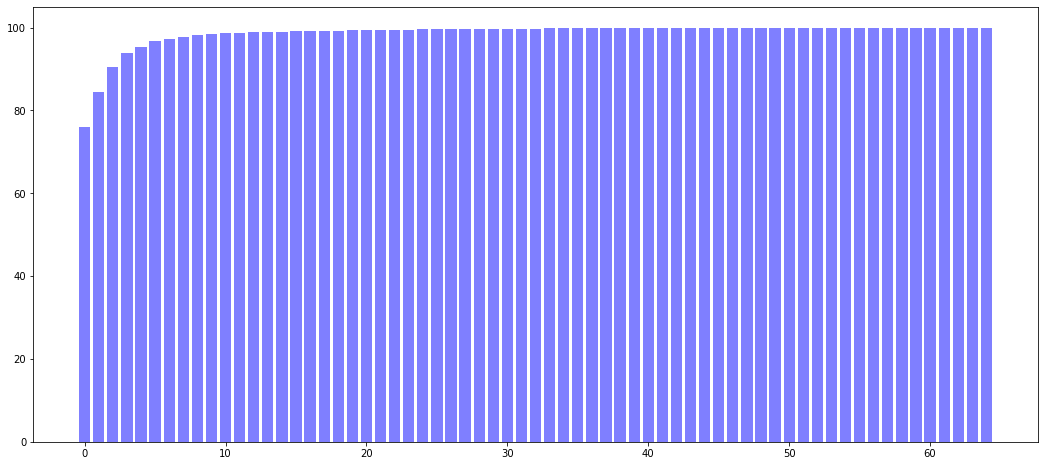

In [83]:
x = dfpca.drop(['income'], axis = 1)
y = dfpca['income']

sklearn_pca = PCA(n_components=65)

y_sklearn = sklearn_pca.fit(x)

cum_sum = sklearn_pca.explained_variance_ratio_.cumsum()

sklearn_pca.explained_variance_ratio_[:10].sum()

cum_sum = cum_sum*100

fig, ax = plt.subplots(figsize=(18,8))
plt.bar(range(65), cum_sum, label='Cumulative _Sum_of_Explained _Varaince', color = 'b',alpha=0.5)

## Taking care of the inbalanced target variable

In [84]:
df2.income.value_counts()

<=50K    23104
>50K      6665
Name: income, dtype: int64

In [85]:
df_over50k = df2[df2.income == '>50K']

df_over50k

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income,sex_new,race_new,nativecountry_new,workclass_new,education_new,maritalstatus_new,occupation_new,relationship_new,income_new,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,maritalstatus_Divorced,maritalstatus_Married-AF-spouse,maritalstatus_Married-civ-spouse,maritalstatus_Married-spouse-absent,maritalstatus_Never-married,maritalstatus_Separated,maritalstatus_Widowed,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,nativecountry_?,nativecountry_Cambodia,nativecountry_Canada,nativecountry_China,nativecountry_Columbia,nativecountry_Cuba,nativecountry_Dominican-Republic,nativecountry_Ecuador,nativecountry_El-Salvador,nativecountry_England,nativecountry_France,nativecountry_Germany,nativecountry_Greece,nativecountry_Guatemala,nativecountry_Haiti,nativecountry_Holand-Netherlands,nativecountry_Honduras,nativecountry_Hong,nativecountry_Hungary,nativecountry_India,nativecountry_Iran,nativecountry_Ireland,nativecountry_Italy,nativecountry_Jamaica,nativecountry_Japan,nativecountry_Laos,nativecountry_Mexico,nativecountry_Nicaragua,nativecountry_Outlying-US(Guam-USVI-etc),nativecountry_Peru,nativecountry_Philippines,nativecountry_Poland,nativecountry_Portugal,nativecountry_Puerto-Rico,nativecountry_Scotland,nativecountry_South,nativecountry_Taiwan,nativecountry_Thailand,nativecountry_Trinadad&Tobago,nativecountry_United-States,nativecountry_Vietnam,nativecountry_Yugoslavia,capitalgain_norm,capitalloss_norm
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,0,0,1,1,9,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.241877,-0.030082
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,1,0,1,0,14,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6.070605,-0.030082
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,0,0,1,0,13,0,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.078914,-0.030082
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K,0,1,1,0,12,0,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.241877,-0.03008

In [86]:
df_under50k = df2[df2.income == '<=50K']

df_under50k = df_under50k.sample(frac=1)

df_under50k = df_under50k[:len(df_over50k)].reset_index()

df_under50k

,index,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income,sex_new,race_new,nativecountry_new,workclass_new,education_new,maritalstatus_new,occupation_new,relationship_new,income_new,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,maritalstatus_Divorced,maritalstatus_Married-AF-spouse,maritalstatus_Married-civ-spouse,maritalstatus_Married-spouse-absent,maritalstatus_Never-married,maritalstatus_Separated,maritalstatus_Widowed,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,nativecountry_?,nativecountry_Cambodia,nativecountry_Canada,nativecountry_China,nativecountry_Columbia,nativecountry_Cuba,nativecountry_Dominican-Republic,nativecountry_Ecuador,nativecountry_El-Salvador,nativecountry_England,nativecountry_France,nativecountry_Germany,nativecountry_Greece,nativecountry_Guatemala,nativecountry_Haiti,nativecountry_Holand-Netherlands,nativecountry_Honduras,nativecountry_Hong,nativecountry_Hungary,nativecountry_India,nativecountry_Iran,nativecountry_Ireland,nativecountry_Italy,nativecountry_Jamaica,nativecountry_Japan,nativecountry_Laos,nativecountry_Mexico,nativecountry_Nicaragua,nativecountry_Outlying-US(Guam-USVI-etc),nativecountry_Peru,nativecountry_Philippines,nativecountry_Poland,nativecountry_Portugal,nativecountry_Puerto-Rico,nativecountry_Scotland,nativecountry_South,nativecountry_Taiwan,nativecountry_Thailand,nativecountry_Trinadad&Tobago,nativecountry_United-States,nativecountry_Vietnam,nativecountry_Yugoslavia,capitalgain_norm,capitalloss_norm
0,2565,24,Private,121313,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K,0,0,1,0,9,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.241877,-0.030082
1,17443,64,Private,216208,Some-college,10,Widowed,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K,1,0,1,0,12,4,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.241877,-0.030082
2,24374,27,Private,113501,Masters,14,Never-married,Adm-clerical,Own-child,White,Male,0,0,45,United-States,<=50K,0,0,1,0,14,1,3,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.241877,-0.030082
3,13937,36,Federal-gov,44364,HS-grad,9,Never-married,Adm-clerical,Own-child,Black,Female,0,0,36,United-States,<=50K,1,1,1,6,9,1,3,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.241877,-0.030082
4,2938,4

In [87]:
df3 = [df_over50k, df_under50k]
df4 = pd.concat(df3, sort=False).reset_index()
df4

,level_0,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income,sex_new,race_new,nativecountry_new,workclass_new,education_new,maritalstatus_new,occupation_new,relationship_new,income_new,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,maritalstatus_Divorced,maritalstatus_Married-AF-spouse,maritalstatus_Married-civ-spouse,maritalstatus_Married-spouse-absent,maritalstatus_Never-married,maritalstatus_Separated,maritalstatus_Widowed,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,nativecountry_?,nativecountry_Cambodia,nativecountry_Canada,nativecountry_China,nativecountry_Columbia,nativecountry_Cuba,nativecountry_Dominican-Republic,nativecountry_Ecuador,nativecountry_El-Salvador,nativecountry_England,nativecountry_France,nativecountry_Germany,nativecountry_Greece,nativecountry_Guatemala,nativecountry_Haiti,nativecountry_Holand-Netherlands,nativecountry_Honduras,nativecountry_Hong,nativecountry_Hungary,nativecountry_India,nativecountry_Iran,nativecountry_Ireland,nativecountry_Italy,nativecountry_Jamaica,nativecountry_Japan,nativecountry_Laos,nativecountry_Mexico,nativecountry_Nicaragua,nativecountry_Outlying-US(Guam-USVI-etc),nativecountry_Peru,nativecountry_Philippines,nativecountry_Poland,nativecountry_Portugal,nativecountry_Puerto-Rico,nativecountry_Scotland,nativecountry_South,nativecountry_Taiwan,nativecountry_Thailand,nativecountry_Trinadad&Tobago,nativecountry_United-States,nativecountry_Vietnam,nativecountry_Yugoslavia,capitalgain_norm,capitalloss_norm,index
0,7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,0,0,1,1,9,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.241877,-0.030082,NaN
1,8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,1,0,1,0,14,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6.070605,-0.030082,NaN
2,9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,0,0,1,0,13,0,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.078914,-0.030082,NaN
3,10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K,0,1,1,0,12,0,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## A few verification on the features

It seems from the bellow graphics that the result from trying to balacing the target variable was not a good idea, since it created scenarios that may not represent the reality. I decided not to balance the target variable and follow with the whole enriched dataset.

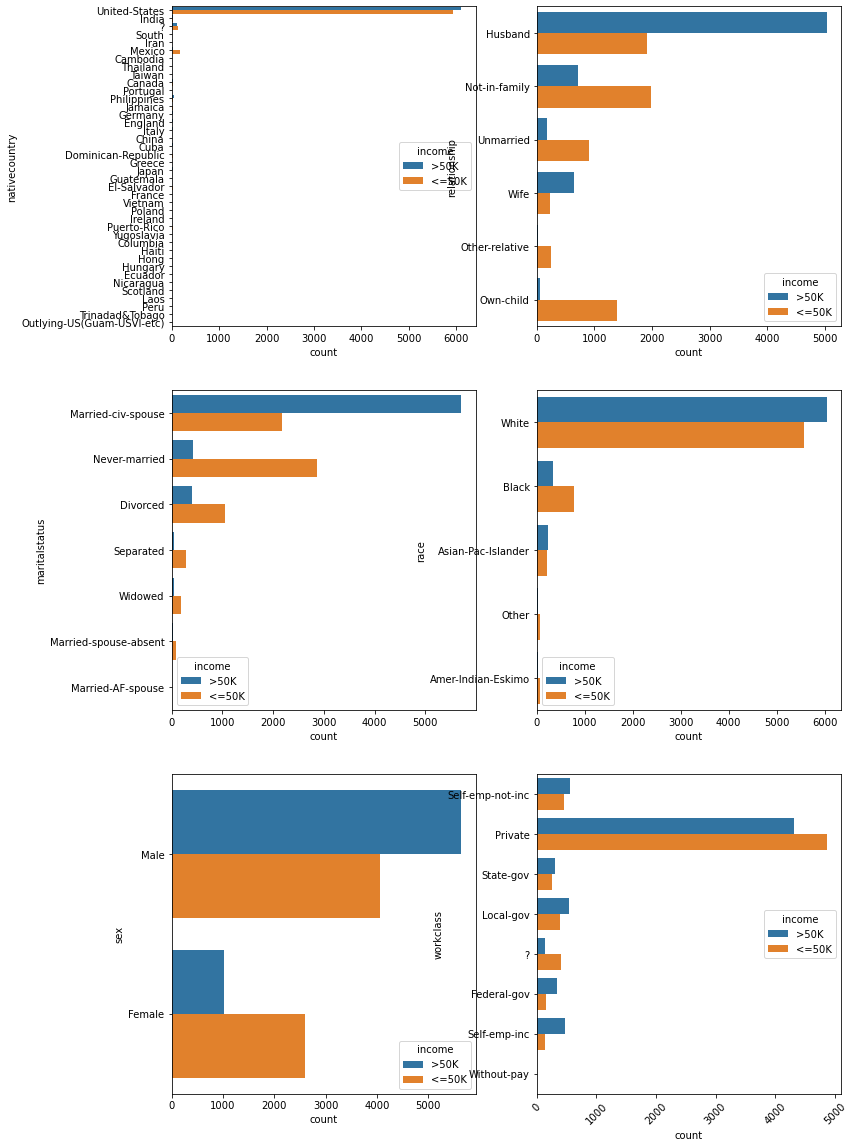

In [88]:
fig, ((a,b),(c,d),(e,f)) = plt.subplots(3,2,figsize=(12,20))
plt.xticks(rotation=45)
sns.countplot(y=df4['workclass'],hue=df4['income'],ax=f)
sns.countplot(y=df4['relationship'],hue=df4['income'],ax=b)
sns.countplot(y=df4['maritalstatus'],hue=df4['income'],ax=c)
sns.countplot(y=df4['race'],hue=df4['income'],ax=d)
sns.countplot(y=df4['sex'],hue=df4['income'],ax=e)
sns.countplot(y=df4['nativecountry'],hue=df4['income'],ax=a)

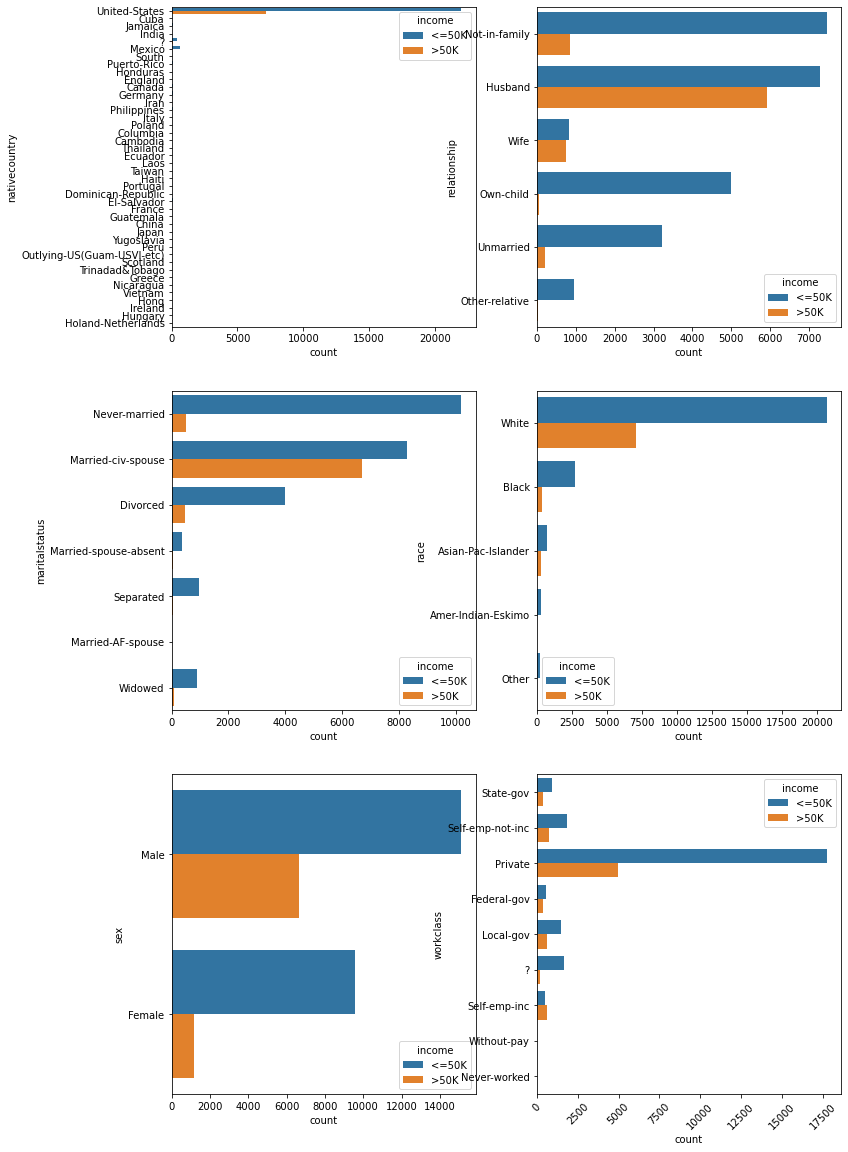

In [89]:
fig, ((a,b),(c,d),(e,f)) = plt.subplots(3,2,figsize=(12,20))
plt.xticks(rotation=45)
sns.countplot(y=df['workclass'],hue=df['income'],ax=f)
sns.countplot(y=df['relationship'],hue=df['income'],ax=b)
sns.countplot(y=df['maritalstatus'],hue=df['income'],ax=c)
sns.countplot(y=df['race'],hue=df['income'],ax=d)
sns.countplot(y=df['sex'],hue=df['income'],ax=e)
sns.countplot(y=df['nativecountry'],hue=df['income'],ax=a)

## Feature importance

In [90]:
cols_drop = [
#'age',
'workclass',
'fnlwgt',
'education',
'educationnum',
'maritalstatus',
'occupation',
'relationship',
'race',
'sex',
'capitalgain',
'capitalloss',
'hoursperweek',
'nativecountry',
'income',
'workclass_new',
'education_new',
'maritalstatus_new',
'occupation_new',
'relationship_new',
'race_new',
'sex_new',
'nativecountry_new',
'income_new',
]

X = df2.drop(cols_drop, axis=1)

y = df2.income_new

Feature ranking:
1. feature 0 (0.288344)
2. feature 103 (0.110948)
3. feature 28 (0.073420)
4. feature 48 (0.048912)
5. feature 30 (0.040488)
6. feature 19 (0.028463)
7. feature 37 (0.027626)
8. feature 43 (0.024440)
9. feature 22 (0.017813)
10. feature 51 (0.015328)
11. feature 49 (0.015260)
12. feature 21 (0.014324)
13. feature 53 (0.013271)
14. feature 59 (0.012742)
15. feature 60 (0.012067)
16. feature 5 (0.011469)
17. feature 7 (0.010278)
18. feature 41 (0.010170)
19. feature 24 (0.010142)
20. feature 25 (0.009780)
21. feature 52 (0.008996)
22. feature 26 (0.008388)
23. feature 100 (0.008354)
24. feature 58 (0.008073)
25. feature 20 (0.007422)
26. feature 6 (0.007274)
27. feature 45 (0.007194)
28. feature 36 (0.007015)
29. feature 2 (0.006937)
30. feature 3 (0.006610)
31. feature 56 (0.006304)
32. feature 8 (0.006032)
33. feature 34 (0.005939)
34. feature 46 (0.005842)
35. feature 18 (0.005593)
36. feature 40 (0.005248)
37. feature 38 (0.005142)
38. feature 17 (0.004881)
39. featu

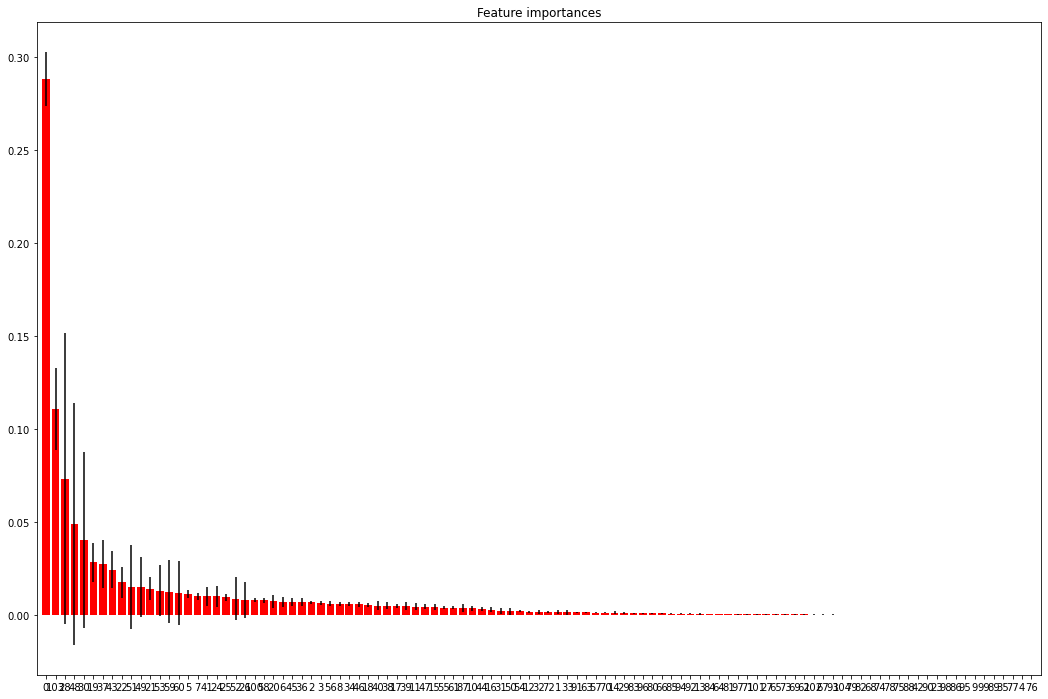

In [91]:
# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(18, 12))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# Train and Test Samples and Normalizing Data

## Dropping columns I will not use

In [92]:
cols_drop = [
#'age',
'workclass',
'fnlwgt',
'education',
'educationnum',
'maritalstatus',
'occupation',
'relationship',
'race',
'sex',
'capitalgain',
'capitalloss',
'hoursperweek',
'nativecountry',
#'income',
'workclass_new',
'education_new',
'maritalstatus_new',
'occupation_new',
'relationship_new',
'race_new',
'sex_new',
'nativecountry_new',
'income_new'
]

df3 = df2.drop(cols_drop, axis=1)

## Spliting the train and test dataframes samples

In [93]:
train, test = train_test_split(df3, test_size = 0.3)

train_x = train.drop(['income'], axis = 1)
train_y = train['income']

test_x = test.drop(['income'], axis = 1)
test_y = test['income']

In [94]:
collections.Counter(train_y)

Counter({'<=50K': 16203, '>50K': 4635})

In [95]:
collections.Counter(test_y)

Counter({'<=50K': 6901, '>50K': 2030})

# KNN Model

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      6901
        >50K       0.67      0.57      0.61      2030

    accuracy                           0.84      8931
   macro avg       0.77      0.74      0.76      8931
weighted avg       0.83      0.84      0.83      8931



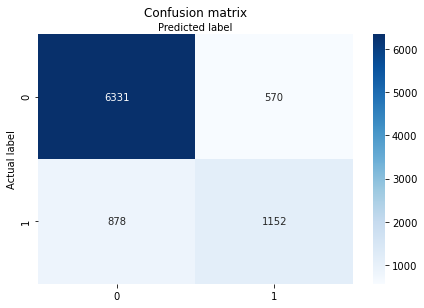

In [97]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(train_x, train_y)

pred_y = knn.predict(test_x)

print(classification_report(test_y, pred_y))

conf_matrix_heat_map(test_y, pred_y)

# Support Vector Machine Model

              precision    recall  f1-score   support

       <=50K       0.81      0.99      0.89      6901
        >50K       0.87      0.23      0.37      2030

    accuracy                           0.82      8931
   macro avg       0.84      0.61      0.63      8931
weighted avg       0.83      0.82      0.77      8931



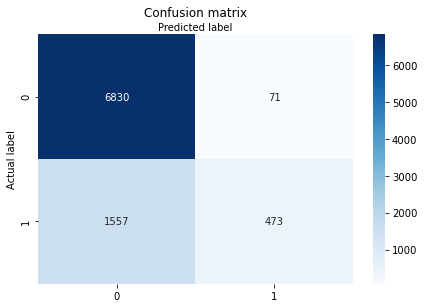

In [98]:
k_gauss = SVC(kernel='rbf', C = 0.05, gamma = 0.077)

k_gauss.fit(train_x, train_y)

pred_y = k_gauss.predict(test_x)

print(classification_report(test_y, pred_y))

conf_matrix_heat_map(test_y, pred_y)

# Decision Tree Classifier

              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      6901
        >50K       0.60      0.53      0.56      2030

    accuracy                           0.81      8931
   macro avg       0.74      0.71      0.72      8931
weighted avg       0.81      0.81      0.81      8931



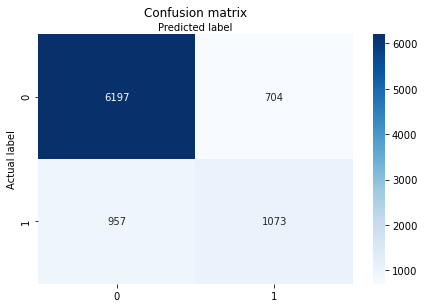

In [99]:
dectree_class = DecisionTreeClassifier(criterion='gini')
dectree_class.fit(train_x, train_y)

pred_y = dectree_class.predict(test_x)

print(classification_report(test_y, pred_y))

conf_matrix_heat_map(test_y, pred_y)

# Random Forest

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      6901
        >50K       0.67      0.56      0.61      2030

    accuracy                           0.84      8931
   macro avg       0.78      0.74      0.76      8931
weighted avg       0.83      0.84      0.83      8931



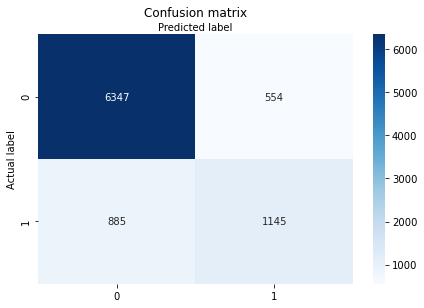

In [100]:
# n_estimators is the number of trees in the forest
rand_forest_clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets 
rand_forest_clf.fit(train_x, train_y)

pred_y = rand_forest_clf.predict(test_x)

print(classification_report(test_y, pred_y))

conf_matrix_heat_map(test_y, pred_y)

# GBoost classifier

score: 0.8591423132907849
              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91      6901
        >50K       0.77      0.54      0.63      2030

    accuracy                           0.86      8931
   macro avg       0.82      0.75      0.77      8931
weighted avg       0.85      0.86      0.85      8931



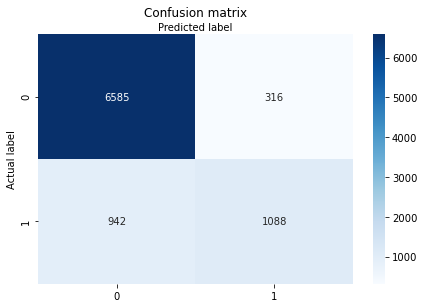

In [101]:
gboostclf = GradientBoostingClassifier(random_state=500)
gboostclf.fit(train_x, train_y)

pred_y = gboostclf.predict(test_x)

print('score:',gboostclf.score(test_x, test_y))

print(classification_report(test_y, pred_y))

conf_matrix_heat_map(test_y, pred_y)

# Logistic Regression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      6901
        >50K       0.72      0.55      0.63      2030

    accuracy                           0.85      8931
   macro avg       0.80      0.74      0.77      8931
weighted avg       0.84      0.85      0.84      8931



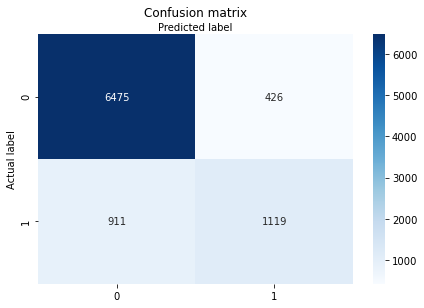

In [102]:
logreg = LogisticRegression()

logreg.fit(train_x, train_y)

pred_y = logreg.predict(test_x)

print(classification_report(test_y, pred_y))

conf_matrix_heat_map(test_y, pred_y)

# Conclusion

I used 6 types of algorithms as classifier models, KNN, support vector machine, decision tree classifier, random forest, xgbooster classifier and logistic regression, which is a regression model but can be utilized as a classifier model when the target variable is binomial (fail or success) and we considered for this matter that the feature income can be considered as fail for income lower than 50k and success for income over 50k. All the models had precision and recall above 70% scores, accuracy above 80%. Even though the dataframe was inbalanced, this was not sufficient to make the models underperform. The one hot encoding was surelly a good strategy as feature enlarging which helped with the explanation power for the independent features.